In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
import tensorflow as tf
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from lime import lime_image
from skimage.segmentation import mark_boundaries
warnings.filterwarnings("ignore")

In [41]:
import glob
train_0 = glob.glob('/train_224/0/*.*')
train_1 = glob.glob('/train_224/1/*.*')
train_2 = glob.glob('/train_224/2/*.*')
train_3 = glob.glob('/train_224/3/*.*')
train_4 = glob.glob('/train_224/4/*.*')
train_5 = glob.glob('/train_224/5/*.*')
train_6 = glob.glob('/train_224/6/*.*')
train_7 = glob.glob('/train_224/7/*.*')
train_8 = glob.glob('/train_224/8/*.*')
train_9 = glob.glob('/train_224/9/*.*')

In [42]:
import glob
test_0 = glob.glob('/test_224/0/*.*')
test_1 = glob.glob('test_224/1/*.*')
test_2 = glob.glob('/test_224/2/*.*')
test_3 = glob.glob('/test_224/3/*.*')
test_4 = glob.glob('/test_224/4/*.*')
test_5 = glob.glob('/test_224/5/*.*')
test_6 = glob.glob('/test_224/6/*.*')
test_7 = glob.glob('/test_224/7/*.*')
test_8 = glob.glob('/test_224/8/*.*')
test_9 = glob.glob('/test_224/9/*.*')

In [43]:
train_data = []
train_labels = []

for i in train_0:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(0)
for i in train_1:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(1)
for i in train_2:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(2)
for i in train_3:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(3)
for i in train_4:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(4)
for i in train_5:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(5)
for i in train_6:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(6)
for i in train_7:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(7)
for i in train_8:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(8)
for i in train_9:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(9)

In [44]:
X_train = np.array(train_data)
y_train = np.array(train_labels)

In [45]:
y_train

array([0, 0, 0, ..., 9, 9, 9])

In [46]:
test_data = []
test_labels = []

for i in test_0:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(0)
for i in test_1:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(1)
for i in test_2:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(2)
for i in test_3:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(3)
for i in test_4:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(4)
for i in test_5:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(5)
for i in test_6:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(6)
for i in test_7:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(7)
for i in test_8:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(8)
for i in test_9:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(9)

In [47]:
X_test = np.array(test_data)
y_test = np.array(test_labels)

In [48]:
y_test

array([0, 0, 0, ..., 8, 8, 9])

In [49]:
num_classes = 10
input_shape = (128, 128, 3)

x_train = X_train
x_test = X_test
y_train = y_train
y_test = y_test

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (110337, 128, 128, 3) - y_train shape: (110337,)
x_test shape: (27584, 128, 128, 3) - y_test shape: (27584,)


In [50]:

# Define the custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        sample = self.X[idx]
        target = self.y[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, target

# Define your transform function
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add other transforms here if needed
])
# Create datasets
train_dataset = CustomDataset(x_train, y_train, transform=transform)
test_dataset = CustomDataset(x_test, y_test, transform=transform)

In [51]:
# Collect all labels from the dataset
labels = []
for _, label in train_dataset:
    labels.append(label)

# Convert to a set to get unique labels
unique_labels = set(labels)

print("Unique labels in train_dataset:", unique_labels)

Unique labels in train_dataset: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [52]:
len(train_dataset)

110337

In [53]:
# Compute sizes for the split
total_size = len(train_dataset)
train_size = int(total_size * 0.83)
dev_size = total_size - train_size  # Ensure that the sizes sum up to the total size

# Print sizes to verify
print(f"Total dataset size: {total_size}")
print(f"Training dataset size: {train_size}")
print(f"Development dataset size: {dev_size}")

Total dataset size: 110337
Training dataset size: 91579
Development dataset size: 18758


In [54]:
# Split the dataset
train_dataset, dev_dataset = random_split(train_dataset, [train_size, dev_size])

In [55]:
total_train_size = len(train_dataset)
total_test_size = len(test_dataset)
total_dev_size = len(dev_dataset)

classes = 10
input_dim = (128, 128, 3)

num_clients = 3
rounds = 5
batch_size = 128
epochs_per_client = 3
learning_rate = 2e-2

In [56]:
def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader(DataLoader):
        def __init__(self, dl, device):
            self.dl = dl
            self.device = device

        def __iter__(self):
            for batch in self.dl:
                yield to_device(batch, self.device)

        def __len__(self):
            return len(self.dl)

device = get_device()

In [57]:
input_dim = 128*128*3
num_classes = 10
# Define the MLP Model
class FederatedMLP(torch.nn.Module):
    def __init__(self, input_dim, num_classes):
        super(FederatedMLP, self).__init__()
        self.fc1 = torch.nn.Linear(np.prod(input_dim), 512)
        self.fc2 = torch.nn.Linear(512, 256)
        self.fc3 = torch.nn.Linear(256, num_classes)
        self.non_linearity = F.relu
        self.track_layers = {'fc1': self.fc1, 'fc2': self.fc2, 'fc3': self.fc3}
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.non_linearity(self.fc1(x))
        x = self.non_linearity(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def get_track_layers(self):
        return self.track_layers
    
    def apply_parameters(self, parameters_dict):
        with torch.no_grad():
            for layer_name in parameters_dict:
                self.track_layers[layer_name].weight.data *= 0
                self.track_layers[layer_name].bias.data *= 0
                self.track_layers[layer_name].weight.data += parameters_dict[layer_name]['weight']
                self.track_layers[layer_name].bias.data += parameters_dict[layer_name]['bias']
    
    def get_parameters(self):
        parameters_dict = dict()
        for layer_name in self.track_layers:
            parameters_dict[layer_name] = {
                'weight': self.track_layers[layer_name].weight.data, 
                'bias': self.track_layers[layer_name].bias.data
            }
        return parameters_dict
    
    def batch_accuracy(self, outputs, labels):
        with torch.no_grad():
            _, predictions = torch.max(outputs, dim=1)
            return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))
    
    def _process_batch(self, batch):
        images, labels = batch
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        accuracy = self.batch_accuracy(outputs, labels)
        return (loss, accuracy)
    
    def fit(self, dataset, epochs, lr, batch_size=128, opt=torch.optim.SGD):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size, shuffle=True), device)
        optimizer = opt(self.parameters(), lr)
        history = []
        for epoch in range(epochs):
            losses = []
            accs = []
            for batch in dataloader:
                loss, acc = self._process_batch(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                losses.append(loss)
                accs.append(acc)
            avg_loss = torch.stack(losses).mean().item()
            avg_acc = torch.stack(accs).mean().item()
            history.append((avg_loss, avg_acc))
        return history
    
    def evaluate(self, dataset, batch_size=128):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size), device)
        losses = []
        accs = []
        all_labels = []
        all_preds = []
        with torch.no_grad():
            for batch in dataloader:
                images, labels = batch
                outputs = self(images)
                loss = F.cross_entropy(outputs, labels)
                accuracy = self.batch_accuracy(outputs, labels)
                
                # Collect true labels and predictions
                _, predictions = torch.max(outputs, dim=1)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predictions.cpu().numpy())
                
                losses.append(loss)
                accs.append(accuracy)
        avg_loss = torch.stack(losses).mean().item()
        avg_acc = torch.stack(accs).mean().item()
        return avg_loss, avg_acc, np.array(all_labels), np.array(all_preds)

In [58]:
class Client:
    def __init__(self, client_id, dataset):
        self.client_id = client_id
        self.dataset = dataset
    
    def get_dataset_size(self):
        return len(self.dataset)
    
    def get_client_id(self):
        return self.client_id
    
    def train(self, parameters_dict):
        net = to_device(FederatedMLP(input_dim, classes), device)
        net.apply_parameters(parameters_dict)
        train_history = net.fit(self.dataset, epochs_per_client, learning_rate, batch_size)
        print('{}: Loss = {}, Accuracy = {}'.format(self.client_id, round(train_history[-1][0], 4), round(train_history[-1][1], 4)))
        return net.get_parameters()


In [60]:
num_clients = 5
rounds = 25
# Example values (replace these with the actual dimensions for your dataset)
input_dim = 49152  # Example for an image with 28x28 pixels (e.g., MNIST dataset)
num_classes = 10  # Example for a classification task with 10 classes



In [61]:
examples_per_client = total_train_size // num_clients
client_datasets = random_split(train_dataset, [min(i + examples_per_client, 
           total_train_size) - i for i in range(0, total_train_size, examples_per_client)])
clients = [Client('client_' + str(i), client_datasets[i]) for i in range(num_clients)]

Start Round 1 ...
client_0: Loss = 0.7975, Accuracy = 0.707
client_1: Loss = 0.7729, Accuracy = 0.705
client_2: Loss = 0.7695, Accuracy = 0.7056
client_3: Loss = 0.7553, Accuracy = 0.7144
client_4: Loss = 0.7618, Accuracy = 0.7063
After round 1, train_loss = 0.7665, train_acc = 0.7140, dev_loss = 0.7707, dev_acc = 0.7093, test_loss = 0.7708, test_acc = 0.7108
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.8572    0.9885    0.9182     17935
           1     0.6274    0.8874    0.7351     31167
           2     0.9395    0.6485    0.7674     21701
           3     0.4446    0.4418    0.4432     10381
           4     0.5000    0.0015    0.0030      6559
           5     0.0000    0.0000    0.0000      1405
           6     0.8789    0.9950    0.9333      1189
           7     0.9595    0.1234    0.2186      1151
           8     0.0000    0.0000    0.0000        81
           9     0.0000    0.0000    0.0000        10

   

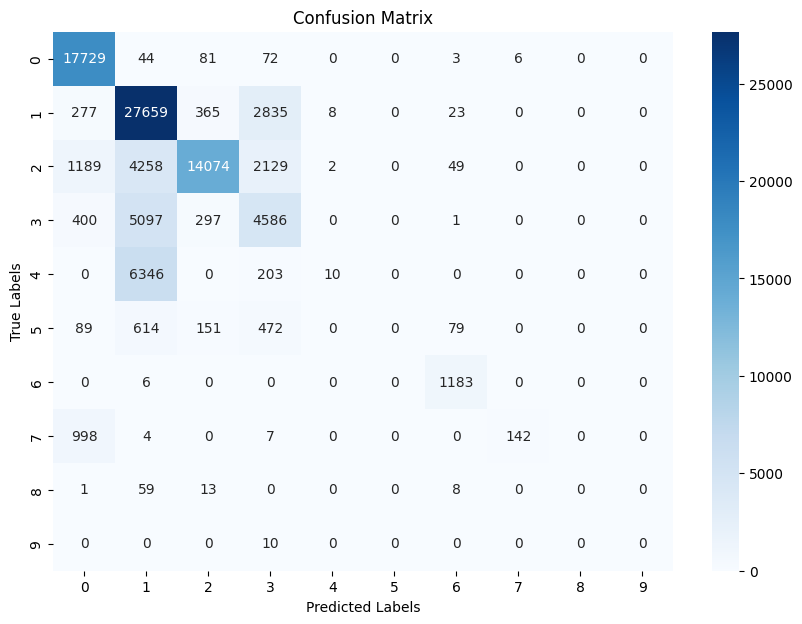

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.8531    0.9913    0.9170      3666
           1     0.6187    0.8844    0.7281      6317
           2     0.9410    0.6450    0.7654      4476
           3     0.4392    0.4291    0.4341      2130
           4     0.5714    0.0030    0.0059      1355
           5     0.0000    0.0000    0.0000       316
           6     0.8714    0.9879    0.9260       247
           7     0.9062    0.1289    0.2257       225
           8     0.0000    0.0000    0.0000        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7090     18758
   macro avg     0.5201    0.4070    0.4002     18758
weighted avg     0.7131    0.7090    0.6717     18758



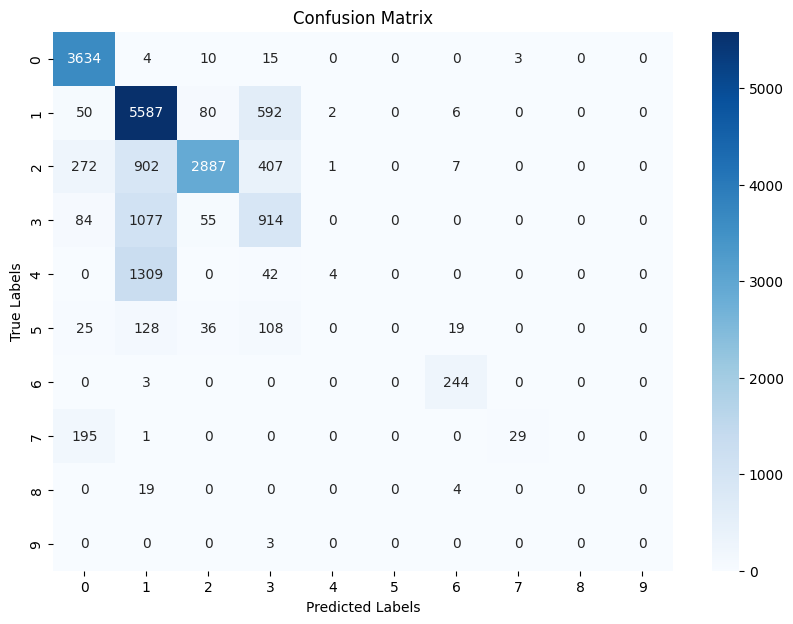

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.8552    0.9882    0.9169      5426
           1     0.6259    0.8885    0.7344      9369
           2     0.9405    0.6540    0.7715      6457
           3     0.4420    0.4423    0.4421      3118
           4     1.0000    0.0014    0.0029      2080
           5     0.0000    0.0000    0.0000       425
           6     0.9003    0.9970    0.9462       335
           7     0.9032    0.0805    0.1478       348
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7125     27584
   macro avg     0.5667    0.4052    0.3962     27584
weighted avg     0.7487    0.7125    0.6740     27584



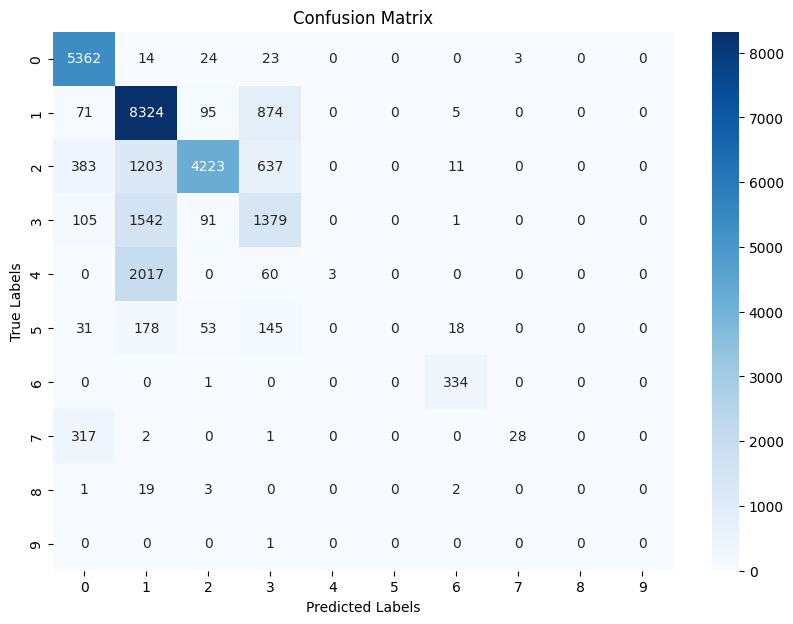

Start Round 2 ...
client_0: Loss = 0.6638, Accuracy = 0.7302
client_1: Loss = 0.6748, Accuracy = 0.7258
client_2: Loss = 0.6713, Accuracy = 0.7286
client_3: Loss = 0.66, Accuracy = 0.7356
client_4: Loss = 0.6641, Accuracy = 0.7291
After round 2, train_loss = 0.6247, train_acc = 0.7387, dev_loss = 0.6271, dev_acc = 0.7395, test_loss = 0.6289, test_acc = 0.7371
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9648    0.9890    0.9767     17935
           1     0.6185    0.9209    0.7400     31167
           2     0.9052    0.7530    0.8221     21701
           3     0.4061    0.2317    0.2950     10381
           4     0.6054    0.0206    0.0398      6559
           5     0.0000    0.0000    0.0000      1405
           6     0.8202    0.9975    0.9002      1189
           7     0.9904    0.9870    0.9887      1151
           8     0.0000    0.0000    0.0000        81
           9     0.0000    0.0000    0.0000        10

   

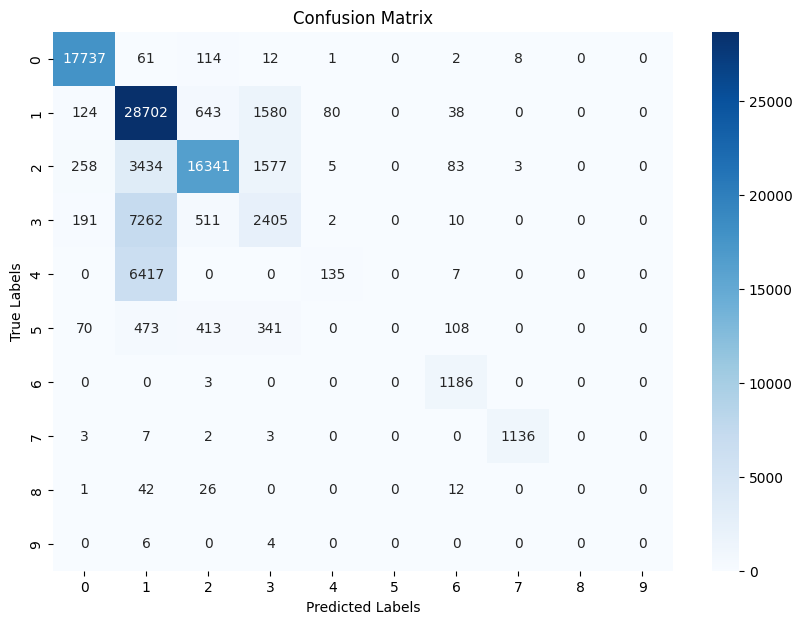

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9619    0.9910    0.9762      3666
           1     0.6156    0.9251    0.7393      6317
           2     0.9059    0.7574    0.8250      4476
           3     0.4244    0.2333    0.3011      2130
           4     0.6000    0.0244    0.0468      1355
           5     0.0000    0.0000    0.0000       316
           6     0.8339    0.9960    0.9077       247
           7     0.9822    0.9822    0.9822       225
           8     0.0000    0.0000    0.0000        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7391     18758
   macro avg     0.5324    0.4909    0.4778     18758
weighted avg     0.7258    0.7391    0.6979     18758



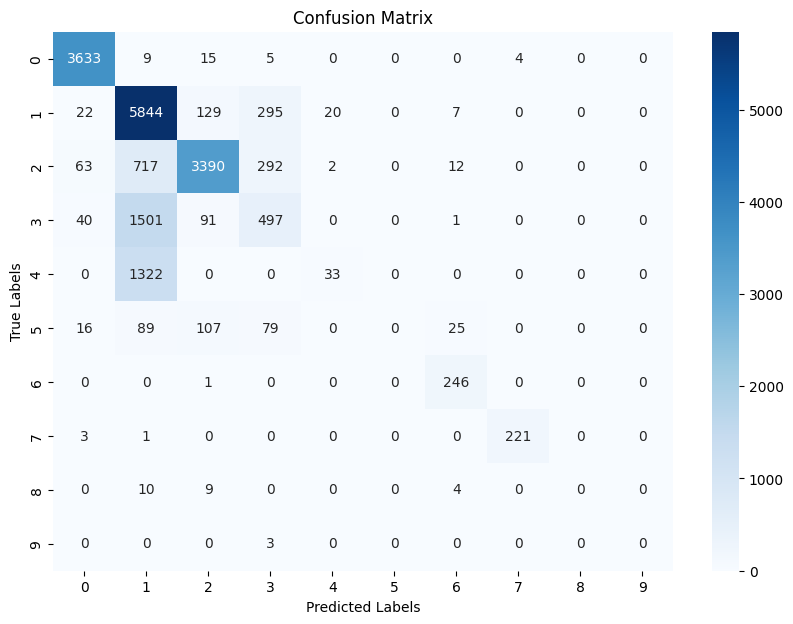

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9668    0.9882    0.9774      5426
           1     0.6149    0.9224    0.7379      9369
           2     0.9054    0.7604    0.8266      6457
           3     0.4031    0.2274    0.2908      3118
           4     0.6441    0.0183    0.0355      2080
           5     0.0000    0.0000    0.0000       425
           6     0.8481    1.0000    0.9178       335
           7     0.9885    0.9885    0.9885       348
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7374     27584
   macro avg     0.5371    0.4905    0.4775     27584
weighted avg     0.7279    0.7374    0.6956     27584



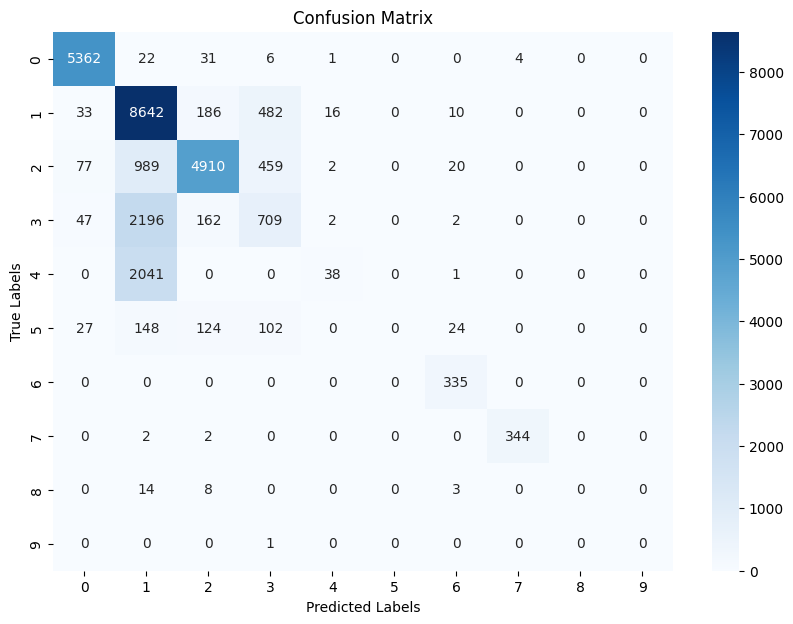

Start Round 3 ...
client_0: Loss = 0.6074, Accuracy = 0.7434
client_1: Loss = 0.6167, Accuracy = 0.7383
client_2: Loss = 0.6234, Accuracy = 0.7405
client_3: Loss = 0.6176, Accuracy = 0.7418
client_4: Loss = 0.626, Accuracy = 0.7414
After round 3, train_loss = 0.6673, train_acc = 0.7276, dev_loss = 0.6686, dev_acc = 0.7270, test_loss = 0.6695, test_acc = 0.7273
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9854    0.9883    0.9869     17935
           1     0.5702    0.9613    0.7158     31167
           2     0.9590    0.7220    0.8238     21701
           3     0.5000    0.0001    0.0002     10381
           4     0.4552    0.1439    0.2187      6559
           5     0.7143    0.0071    0.0141      1405
           6     0.8213    0.9975    0.9009      1189
           7     0.9710    0.9896    0.9802      1151
           8     0.0000    0.0000    0.0000        81
           9     0.0000    0.0000    0.0000        10

  

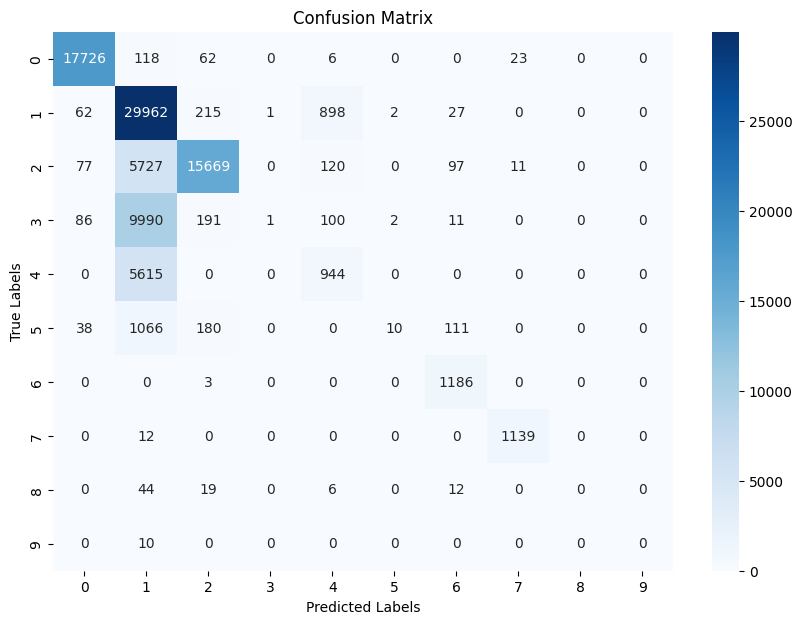

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9832    0.9896    0.9864      3666
           1     0.5669    0.9618    0.7134      6317
           2     0.9600    0.7288    0.8285      4476
           3     0.0000    0.0000    0.0000      2130
           4     0.4597    0.1432    0.2183      1355
           5     0.6667    0.0063    0.0125       316
           6     0.8339    0.9960    0.9077       247
           7     0.9569    0.9867    0.9716       225
           8     0.0000    0.0000    0.0000        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7266     18758
   macro avg     0.5427    0.4812    0.4638     18758
weighted avg     0.6790    0.7266    0.6703     18758



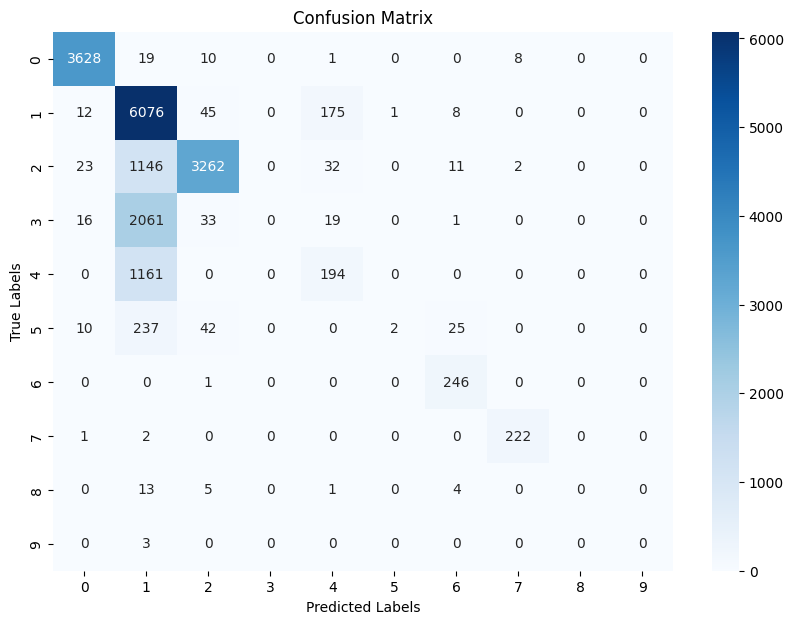

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9853    0.9880    0.9867      5426
           1     0.5690    0.9621    0.7151      9369
           2     0.9580    0.7319    0.8299      6457
           3     0.5000    0.0010    0.0019      3118
           4     0.4672    0.1370    0.2119      2080
           5     1.0000    0.0071    0.0140       425
           6     0.8438    1.0000    0.9153       335
           7     0.9773    0.9885    0.9829       348
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7276     27584
   macro avg     0.6301    0.4816    0.4658     27584
weighted avg     0.7411    0.7276    0.6711     27584



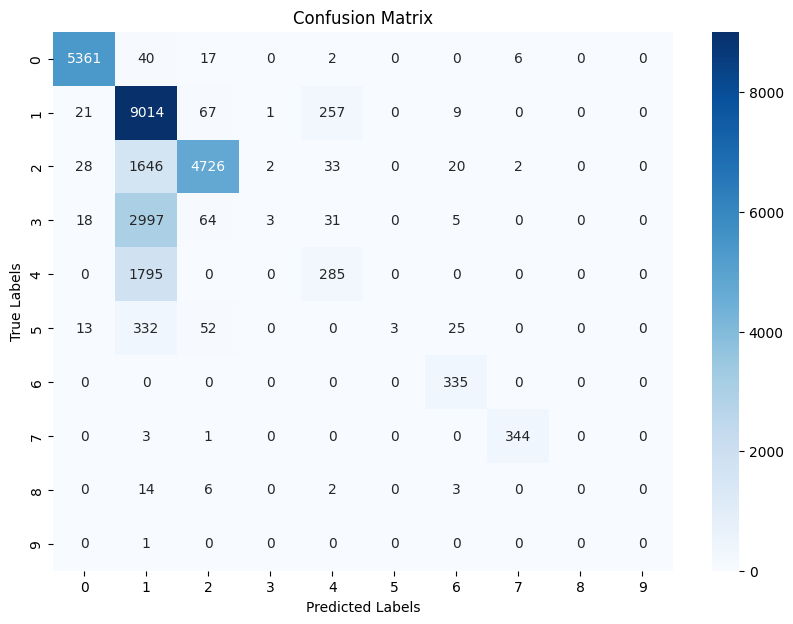

Start Round 4 ...
client_0: Loss = 0.5817, Accuracy = 0.7485
client_1: Loss = 0.6547, Accuracy = 0.7364
client_2: Loss = 0.5923, Accuracy = 0.7481
client_3: Loss = 0.5812, Accuracy = 0.7507
client_4: Loss = 0.5835, Accuracy = 0.7486
After round 4, train_loss = 0.6142, train_acc = 0.7452, dev_loss = 0.6136, dev_acc = 0.7436, test_loss = 0.6173, test_acc = 0.7465
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9675    0.9832     17935
           1     0.6815    0.8074    0.7391     31167
           2     0.7353    0.8613    0.7934     21701
           3     0.5733    0.1073    0.1808     10381
           4     0.4907    0.5493    0.5183      6559
           5     0.0000    0.0000    0.0000      1405
           6     0.8647    0.9891    0.9227      1189
           7     0.9330    0.9922    0.9617      1151
           8     0.0000    0.0000    0.0000        81
           9     0.0000    0.0000    0.0000        10

 

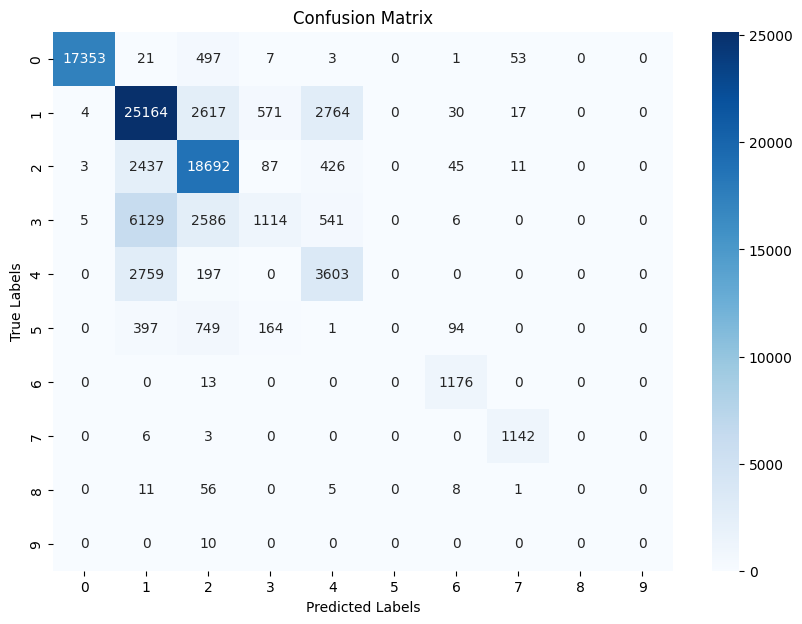

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9724    0.9855      3666
           1     0.6756    0.8104    0.7369      6317
           2     0.7412    0.8599    0.7962      4476
           3     0.5781    0.1042    0.1766      2130
           4     0.4771    0.5314    0.5028      1355
           5     0.0000    0.0000    0.0000       316
           6     0.8526    0.9838    0.9135       247
           7     0.9253    0.9911    0.9571       225
           8     0.0000    0.0000    0.0000        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7432     18758
   macro avg     0.5249    0.5253    0.5069     18758
weighted avg     0.7220    0.7432    0.7106     18758



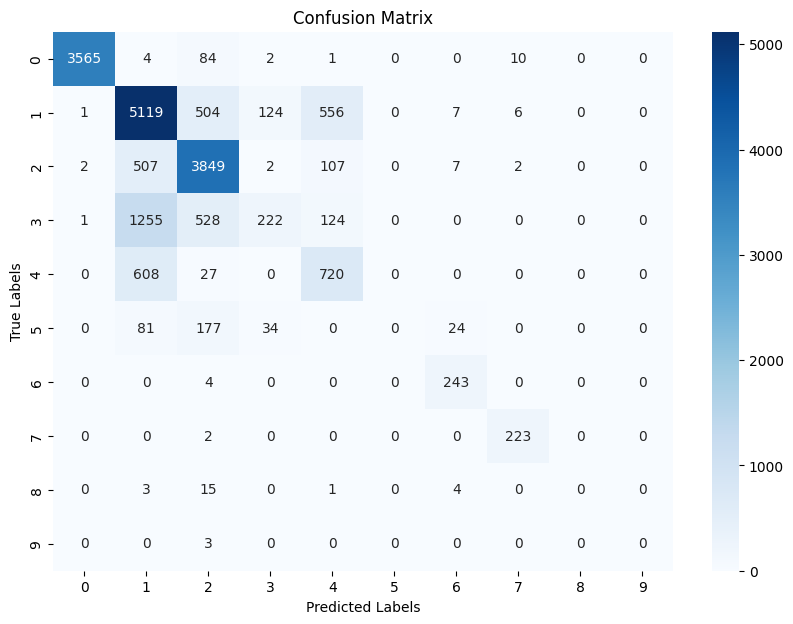

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9657    0.9825      5426
           1     0.6785    0.8124    0.7394      9369
           2     0.7372    0.8690    0.7977      6457
           3     0.5841    0.1036    0.1760      3118
           4     0.5110    0.5481    0.5289      2080
           5     0.0000    0.0000    0.0000       425
           6     0.8973    0.9910    0.9418       335
           7     0.9557    0.9914    0.9732       348
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7469     27584
   macro avg     0.5364    0.5281    0.5139     27584
weighted avg     0.7272    0.7469    0.7146     27584



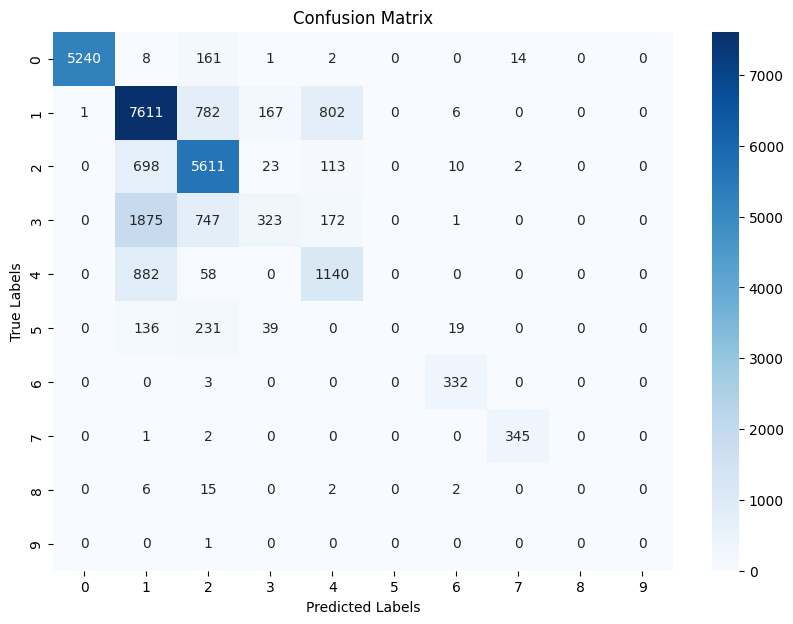

Start Round 5 ...
client_0: Loss = 0.5537, Accuracy = 0.7585
client_1: Loss = 0.5662, Accuracy = 0.752
client_2: Loss = 0.5735, Accuracy = 0.7525
client_3: Loss = 0.5536, Accuracy = 0.7562
client_4: Loss = 0.567, Accuracy = 0.7548
After round 5, train_loss = 0.5309, train_acc = 0.7686, dev_loss = 0.5402, dev_acc = 0.7661, test_loss = 0.5381, test_acc = 0.7660
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9973    0.9938    0.9956     17935
           1     0.6977    0.8362    0.7607     31167
           2     0.8913    0.7775    0.8305     21701
           3     0.4744    0.6178    0.5367     10381
           4     0.6182    0.1375    0.2250      6559
           5     1.0000    0.0135    0.0267      1405
           6     0.9082    0.9731    0.9395      1189
           7     0.9853    0.9887    0.9870      1151
           8     0.0000    0.0000    0.0000        81
           9     0.0000    0.0000    0.0000        10

   

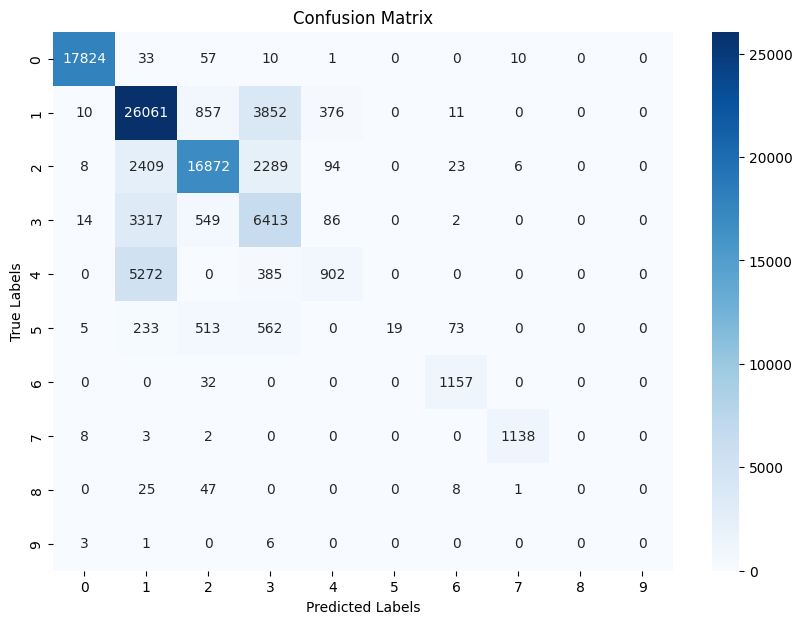

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9948    0.9940    0.9944      3666
           1     0.6917    0.8305    0.7548      6317
           2     0.8966    0.7828    0.8359      4476
           3     0.4775    0.6225    0.5405      2130
           4     0.5586    0.1373    0.2204      1355
           5     1.0000    0.0063    0.0126       316
           6     0.8835    0.9514    0.9162       247
           7     0.9822    0.9822    0.9822       225
           8     0.0000    0.0000    0.0000        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7658     18758
   macro avg     0.6485    0.5307    0.5257     18758
weighted avg     0.7761    0.7658    0.7493     18758



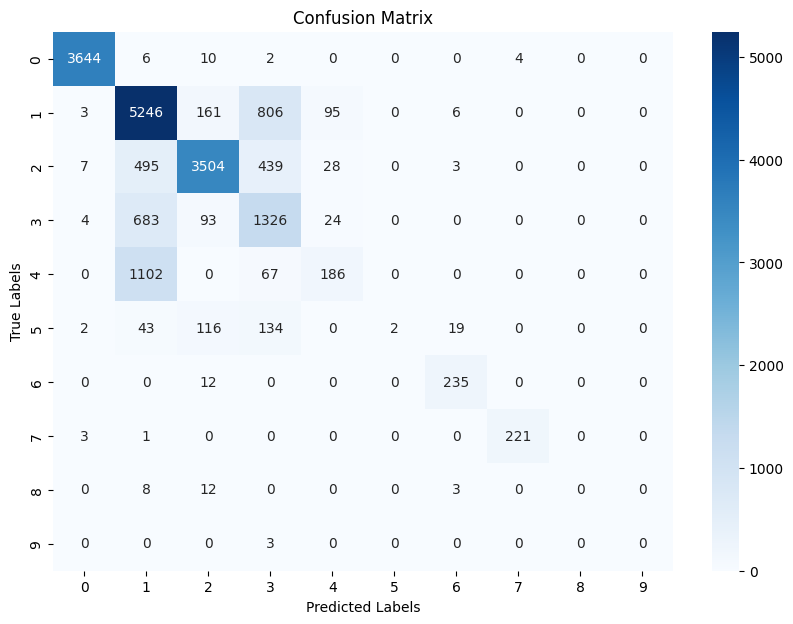

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9974    0.9923    0.9948      5426
           1     0.6920    0.8337    0.7563      9369
           2     0.8887    0.7852    0.8337      6457
           3     0.4756    0.6180    0.5375      3118
           4     0.6256    0.1317    0.2176      2080
           5     1.0000    0.0165    0.0324       425
           6     0.9253    0.9612    0.9429       335
           7     0.9885    0.9885    0.9885       348
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7664     27584
   macro avg     0.6593    0.5327    0.5304     27584
weighted avg     0.7793    0.7664    0.7493     27584



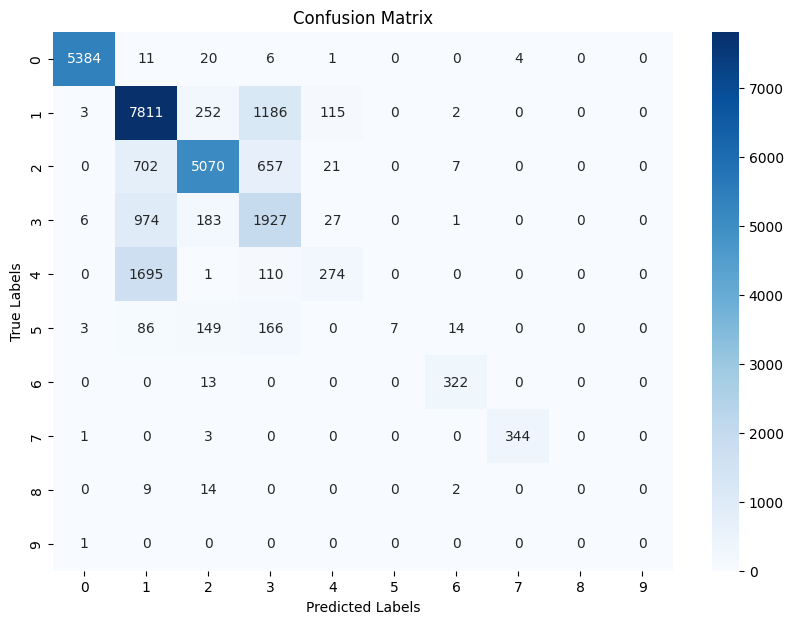

Start Round 6 ...
client_0: Loss = 0.5426, Accuracy = 0.7555
client_1: Loss = 0.5524, Accuracy = 0.7549
client_2: Loss = 0.5433, Accuracy = 0.7555
client_3: Loss = 0.5435, Accuracy = 0.7622
client_4: Loss = 0.5437, Accuracy = 0.7598
After round 6, train_loss = 0.5170, train_acc = 0.7763, dev_loss = 0.5224, dev_acc = 0.7699, test_loss = 0.5216, test_acc = 0.7738
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9943    0.9970    0.9957     17935
           1     0.7249    0.8019    0.7615     31167
           2     0.8942    0.8066    0.8481     21701
           3     0.4801    0.5858    0.5277     10381
           4     0.5234    0.3345    0.4081      6559
           5     0.6126    0.0833    0.1466      1405
           6     0.8868    0.9950    0.9378      1189
           7     0.9836    0.9896    0.9866      1151
           8     0.0000    0.0000    0.0000        81
           9     0.0000    0.0000    0.0000        10

 

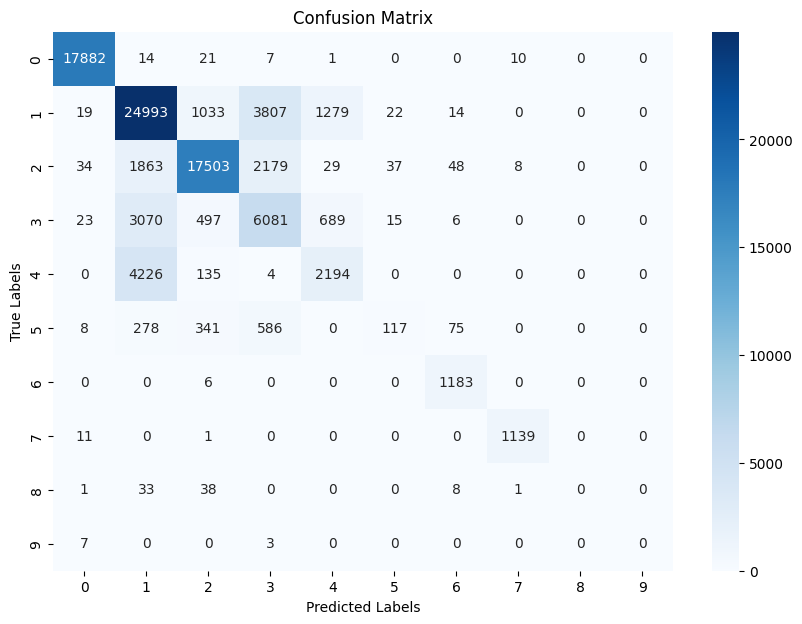

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9908    0.9973    0.9940      3666
           1     0.7121    0.7950    0.7513      6317
           2     0.8920    0.8103    0.8492      4476
           3     0.4804    0.5817    0.5262      2130
           4     0.4940    0.3026    0.3753      1355
           5     0.4857    0.0538    0.0969       316
           6     0.8714    0.9879    0.9260       247
           7     0.9779    0.9822    0.9800       225
           8     0.0000    0.0000    0.0000        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7696     18758
   macro avg     0.5904    0.5511    0.5499     18758
weighted avg     0.7679    0.7696    0.7624     18758



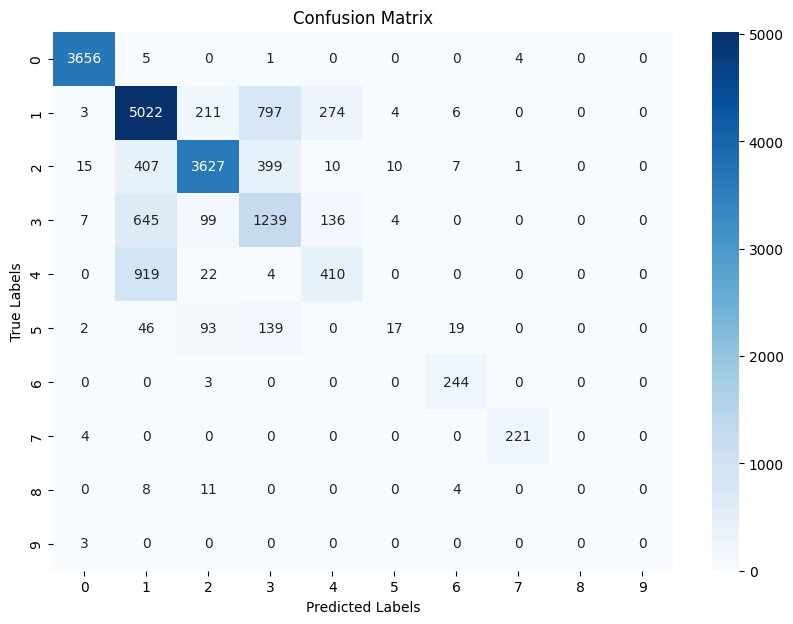

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9947    0.9958    0.9952      5426
           1     0.7216    0.8002    0.7589      9369
           2     0.8963    0.8126    0.8524      6457
           3     0.4776    0.5850    0.5259      3118
           4     0.5162    0.3216    0.3963      2080
           5     0.5000    0.0871    0.1483       425
           6     0.9079    1.0000    0.9517       335
           7     0.9829    0.9914    0.9871       348
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7743     27584
   macro avg     0.5997    0.5594    0.5616     27584
weighted avg     0.7746    0.7743    0.7687     27584



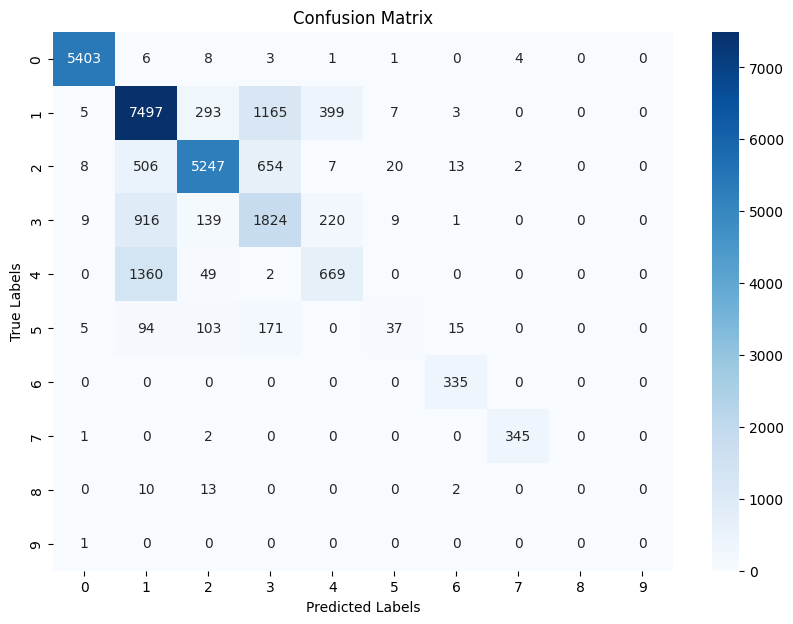

Start Round 7 ...
client_0: Loss = 0.5278, Accuracy = 0.7616
client_1: Loss = 0.5256, Accuracy = 0.7626
client_2: Loss = 0.5357, Accuracy = 0.7611
client_3: Loss = 0.53, Accuracy = 0.7614
client_4: Loss = 0.5314, Accuracy = 0.7654
After round 7, train_loss = 0.5923, train_acc = 0.7318, dev_loss = 0.5952, dev_acc = 0.7297, test_loss = 0.5932, test_acc = 0.7338
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9976    0.9959    0.9968     17935
           1     0.6749    0.7973    0.7310     31167
           2     0.6520    0.8918    0.7533     21701
           3     0.5598    0.2068    0.3021     10381
           4     0.5526    0.0729    0.1288      6559
           5     1.0000    0.0178    0.0350      1405
           6     0.9114    0.9773    0.9432      1189
           7     0.9702    0.9913    0.9807      1151
           8     0.0000    0.0000    0.0000        81
           9     0.0000    0.0000    0.0000        10

   

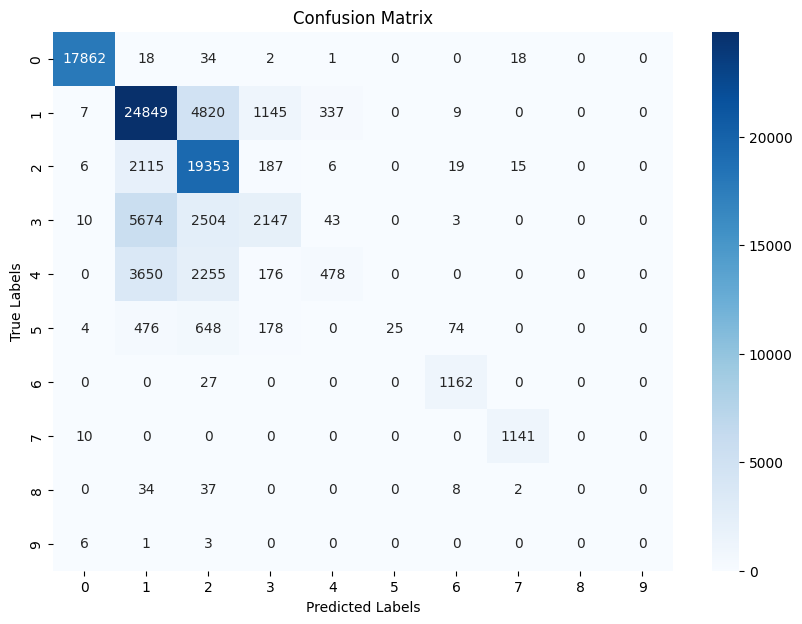

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9946    0.9959    0.9952      3666
           1     0.6706    0.8004    0.7297      6317
           2     0.6571    0.8939    0.7574      4476
           3     0.5293    0.1948    0.2848      2130
           4     0.5556    0.0701    0.1245      1355
           5     0.8333    0.0158    0.0311       316
           6     0.8843    0.9595    0.9204       247
           7     0.9694    0.9867    0.9780       225
           8     0.0000    0.0000    0.0000        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7294     18758
   macro avg     0.6094    0.4917    0.4821     18758
weighted avg     0.7145    0.7294    0.6867     18758



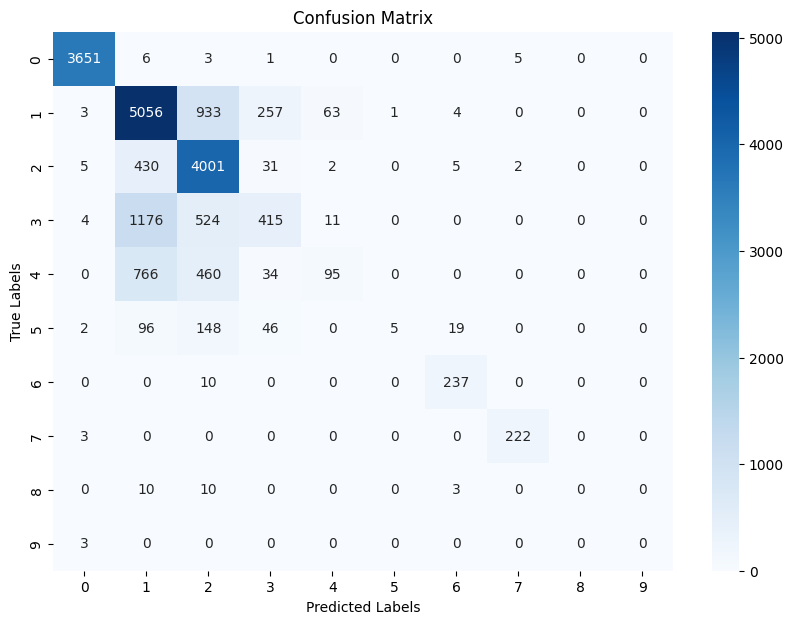

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9950    0.9964      5426
           1     0.6765    0.8048    0.7351      9369
           2     0.6524    0.8992    0.7561      6457
           3     0.5870    0.2174    0.3173      3118
           4     0.5774    0.0736    0.1305      2080
           5     0.8889    0.0188    0.0369       425
           6     0.9280    0.9612    0.9443       335
           7     0.9801    0.9914    0.9857       348
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7342     27584
   macro avg     0.6288    0.4961    0.4902     27584
weighted avg     0.7260    0.7342    0.6929     27584



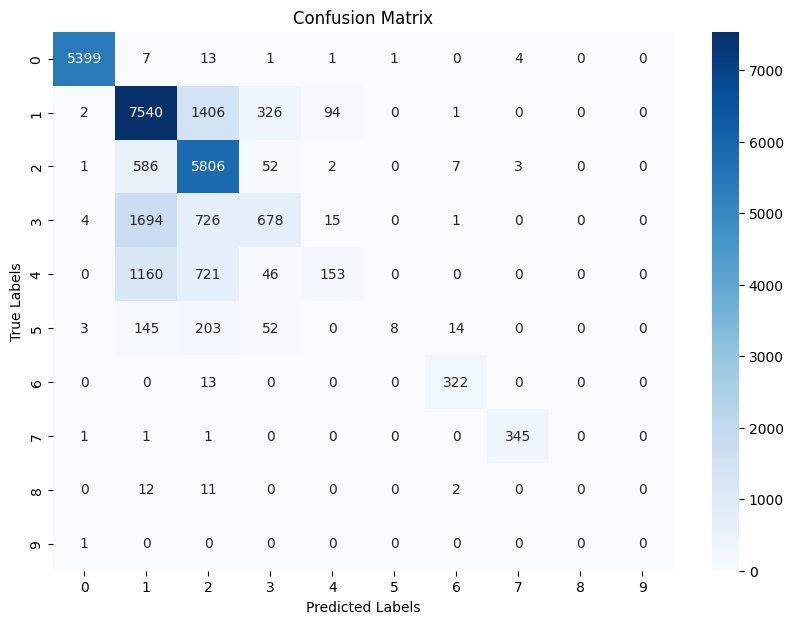

Start Round 8 ...
client_0: Loss = 0.5103, Accuracy = 0.7674
client_1: Loss = 0.5324, Accuracy = 0.7571
client_2: Loss = 0.5172, Accuracy = 0.7658
client_3: Loss = 0.5386, Accuracy = 0.7636
client_4: Loss = 0.5209, Accuracy = 0.7676
After round 8, train_loss = 0.5456, train_acc = 0.7604, dev_loss = 0.5499, dev_acc = 0.7566, test_loss = 0.5504, test_acc = 0.7598
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9737    0.9867     17935
           1     0.7495    0.7542    0.7518     31167
           2     0.9781    0.7059    0.8200     21701
           3     0.4287    0.6753    0.5244     10381
           4     0.5137    0.5618    0.5367      6559
           5     0.2997    0.2391    0.2660      1405
           6     0.9123    0.9882    0.9487      1189
           7     0.9853    0.9870    0.9861      1151
           8     0.0000    0.0000    0.0000        81
           9     0.0000    0.0000    0.0000        10

 

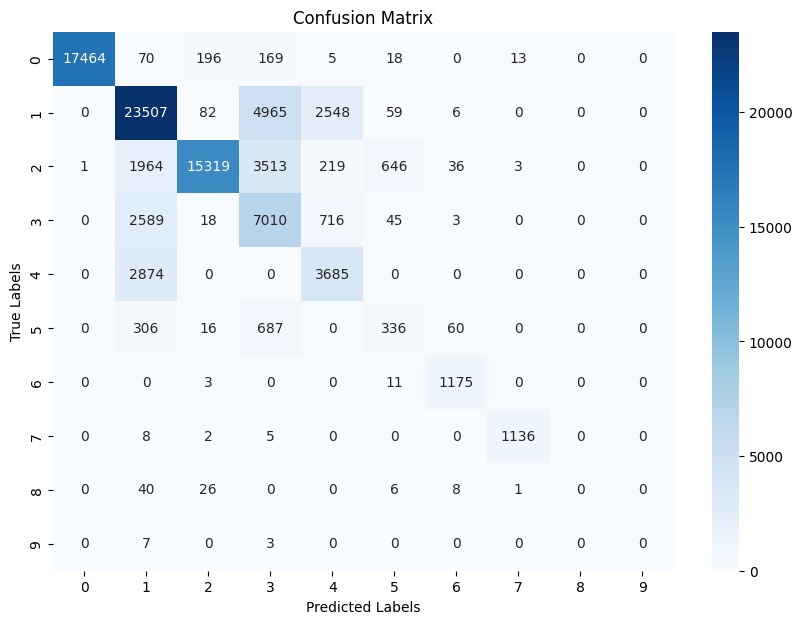

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9757    0.9877      3666
           1     0.7410    0.7494    0.7452      6317
           2     0.9794    0.7127    0.8250      4476
           3     0.4280    0.6737    0.5234      2130
           4     0.4934    0.5247    0.5086      1355
           5     0.3115    0.2405    0.2714       316
           6     0.9067    0.9838    0.9437       247
           7     0.9694    0.9867    0.9780       225
           8     0.0000    0.0000    0.0000        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7564     18758
   macro avg     0.5829    0.5847    0.5783     18758
weighted avg     0.7917    0.7564    0.7658     18758



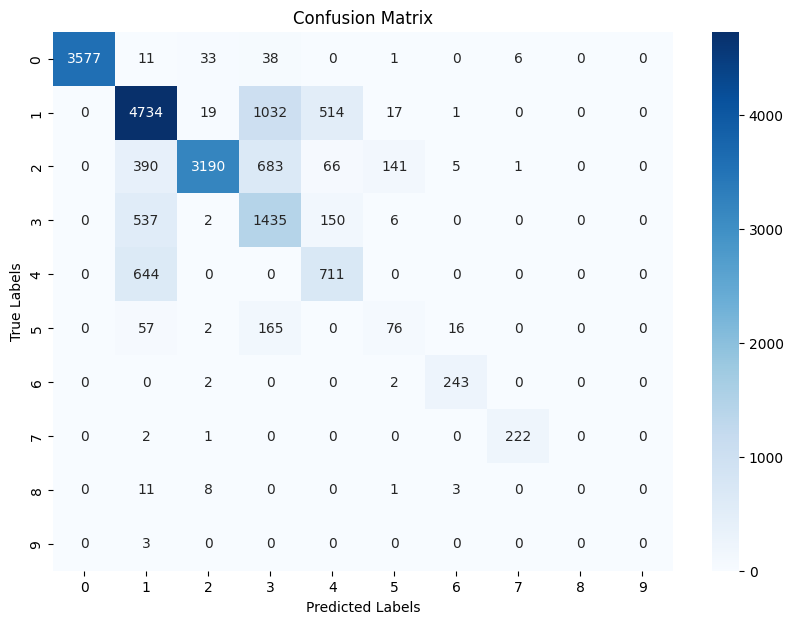

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9711    0.9852      5426
           1     0.7463    0.7525    0.7494      9369
           2     0.9809    0.7144    0.8267      6457
           3     0.4271    0.6732    0.5227      3118
           4     0.5231    0.5611    0.5414      2080
           5     0.3099    0.2282    0.2629       425
           6     0.9246    0.9881    0.9553       335
           7     0.9857    0.9885    0.9871       348
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7602     27584
   macro avg     0.5897    0.5877    0.5831     27584
weighted avg     0.7959    0.7602    0.7699     27584



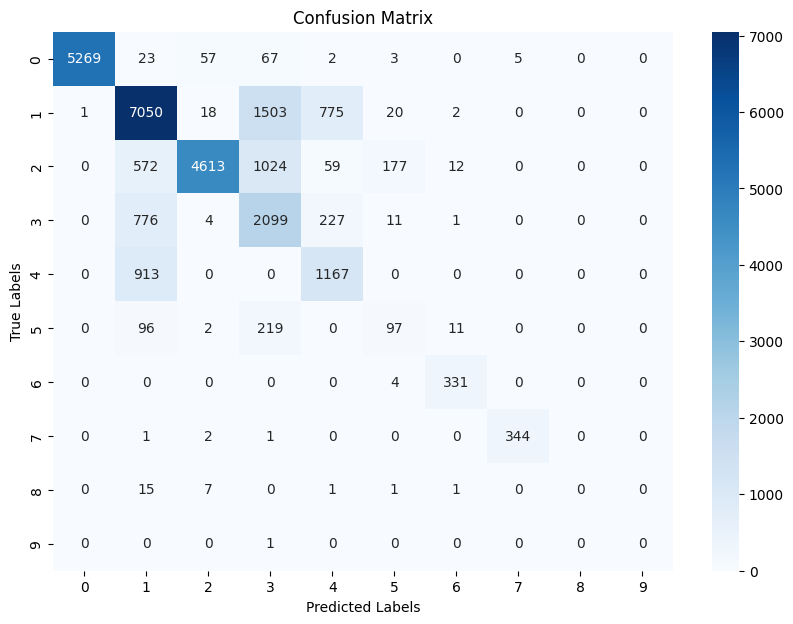

Start Round 9 ...
client_0: Loss = 0.4996, Accuracy = 0.7734
client_1: Loss = 0.5014, Accuracy = 0.7659
client_2: Loss = 0.5114, Accuracy = 0.7692
client_3: Loss = 0.5037, Accuracy = 0.7694
client_4: Loss = 0.5056, Accuracy = 0.7678
After round 9, train_loss = 0.4842, train_acc = 0.7741, dev_loss = 0.4930, dev_acc = 0.7677, test_loss = 0.4873, test_acc = 0.7738
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9972    0.9974    0.9973     17935
           1     0.6788    0.8206    0.7430     31167
           2     0.9666    0.7471    0.8428     21701
           3     0.5526    0.4091    0.4702     10381
           4     0.5149    0.6801    0.5861      6559
           5     0.5374    0.1331    0.2133      1405
           6     0.8815    0.9950    0.9348      1189
           7     0.9904    0.9878    0.9891      1151
           8     1.0000    0.0494    0.0941        81
           9     0.0000    0.0000    0.0000        10

 

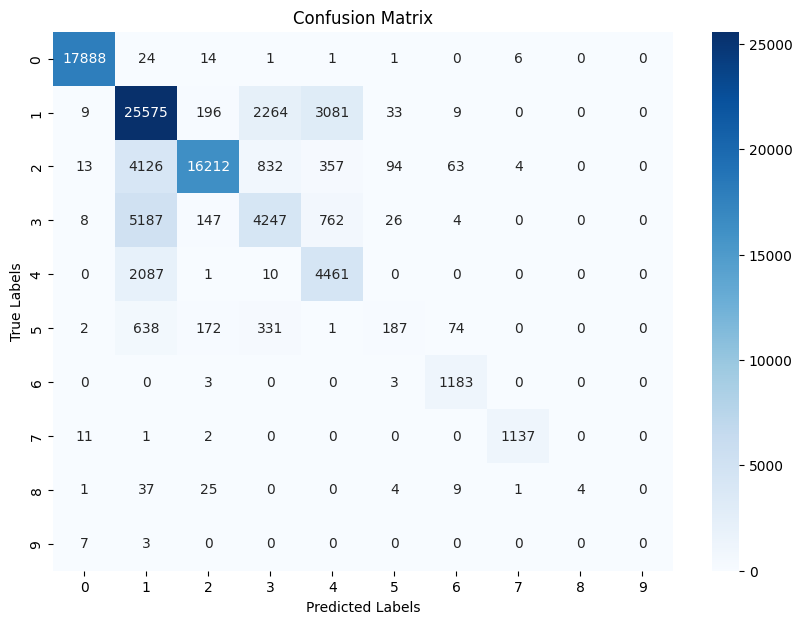

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9943    0.9967    0.9955      3666
           1     0.6720    0.8118    0.7353      6317
           2     0.9616    0.7547    0.8457      4476
           3     0.5312    0.4000    0.4563      2130
           4     0.5006    0.6494    0.5654      1355
           5     0.4722    0.1076    0.1753       316
           6     0.8813    0.9919    0.9333       247
           7     0.9780    0.9867    0.9823       225
           8     0.0000    0.0000    0.0000        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7673     18758
   macro avg     0.5991    0.5699    0.5689     18758
weighted avg     0.7778    0.7673    0.7637     18758



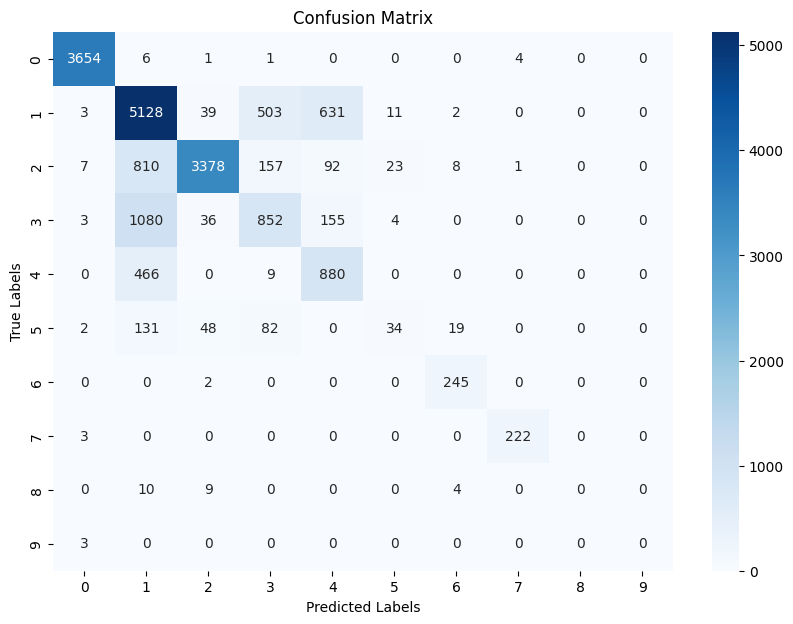

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9983    0.9961    0.9972      5426
           1     0.6753    0.8171    0.7395      9369
           2     0.9623    0.7517    0.8441      6457
           3     0.5614    0.4118    0.4751      3118
           4     0.5281    0.6817    0.5952      2080
           5     0.5446    0.1294    0.2091       425
           6     0.9076    0.9970    0.9502       335
           7     0.9914    0.9885    0.9899       348
           8     1.0000    0.1200    0.2143        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7741     27584
   macro avg     0.7169    0.5893    0.6015     27584
weighted avg     0.7871    0.7741    0.7709     27584



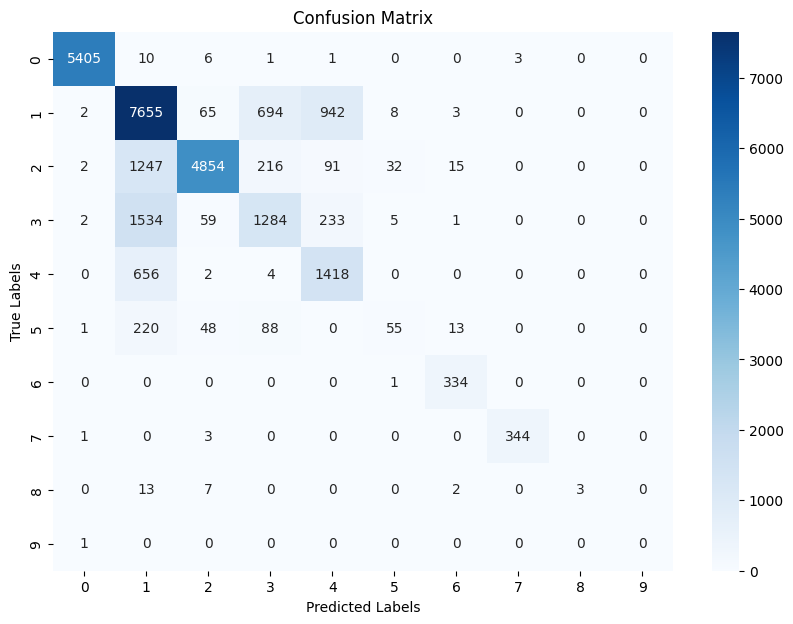

Start Round 10 ...
client_0: Loss = 0.491, Accuracy = 0.7756
client_1: Loss = 0.4994, Accuracy = 0.7694
client_2: Loss = 0.4989, Accuracy = 0.7734
client_3: Loss = 0.4928, Accuracy = 0.7703
client_4: Loss = 0.6337, Accuracy = 0.7511
After round 10, train_loss = 0.5727, train_acc = 0.7571, dev_loss = 0.5774, dev_acc = 0.7521, test_loss = 0.5718, test_acc = 0.7580
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9496    0.9988    0.9736     17935
           1     0.6748    0.8608    0.7565     31167
           2     0.9621    0.6958    0.8075     21701
           3     0.4808    0.4065    0.4405     10381
           4     0.5211    0.4034    0.4548      6559
           5     0.3734    0.2057    0.2653      1405
           6     0.8131    0.9992    0.8966      1189
           7     0.9844    0.9896    0.9870      1151
           8     0.5625    0.1111    0.1856        81
           9     0.0000    0.0000    0.0000        10



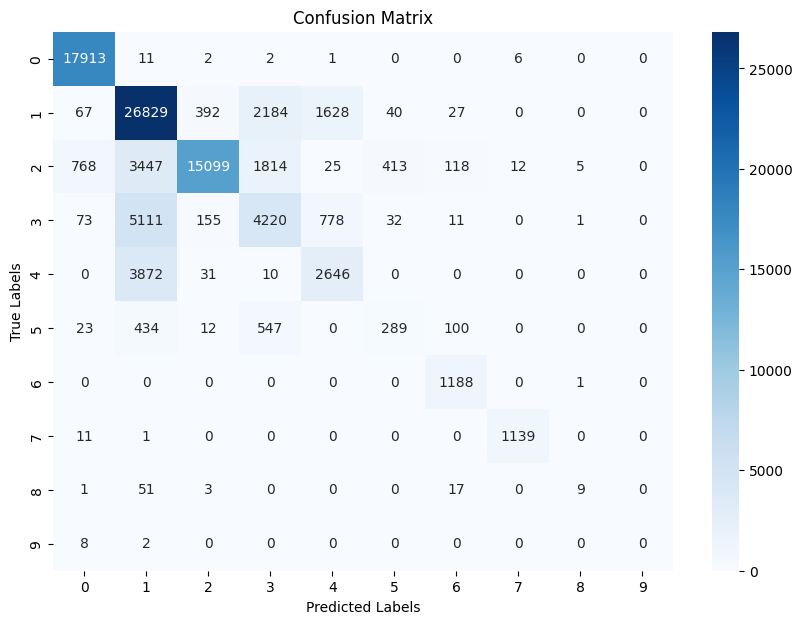

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9494    0.9986    0.9734      3666
           1     0.6631    0.8518    0.7457      6317
           2     0.9669    0.6973    0.8102      4476
           3     0.4898    0.4150    0.4493      2130
           4     0.4933    0.3786    0.4284      1355
           5     0.3966    0.2247    0.2869       316
           6     0.8072    1.0000    0.8933       247
           7     0.9780    0.9867    0.9823       225
           8     1.0000    0.0870    0.1600        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7518     18758
   macro avg     0.6744    0.5640    0.5730     18758
weighted avg     0.7611    0.7518    0.7452     18758



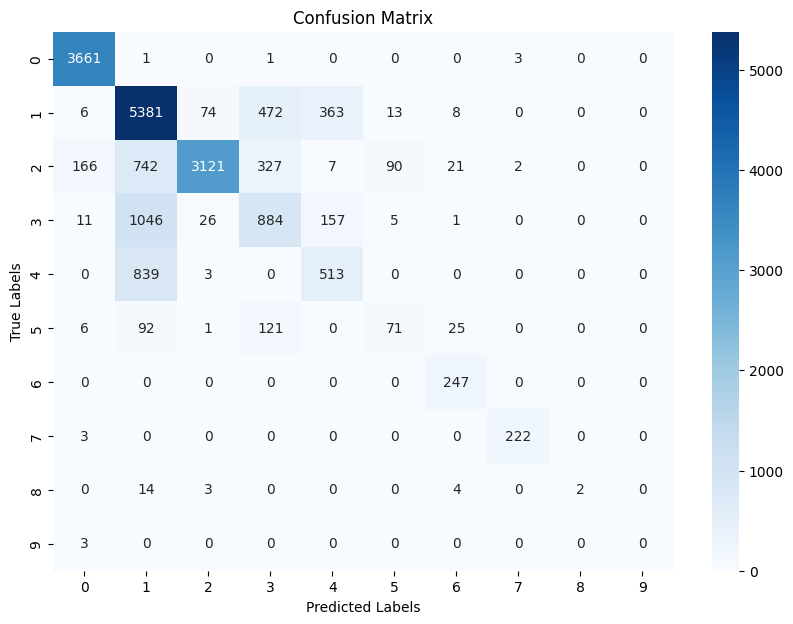

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9537    0.9976    0.9751      5426
           1     0.6712    0.8602    0.7541      9369
           2     0.9723    0.7074    0.8190      6457
           3     0.4843    0.4112    0.4448      3118
           4     0.5258    0.3971    0.4525      2080
           5     0.3636    0.1976    0.2561       425
           6     0.8396    1.0000    0.9128       335
           7     0.9885    0.9914    0.9900       348
           8     0.5714    0.1600    0.2500        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7583     27584
   macro avg     0.6371    0.5723    0.5854     27584
weighted avg     0.7664    0.7583    0.7518     27584



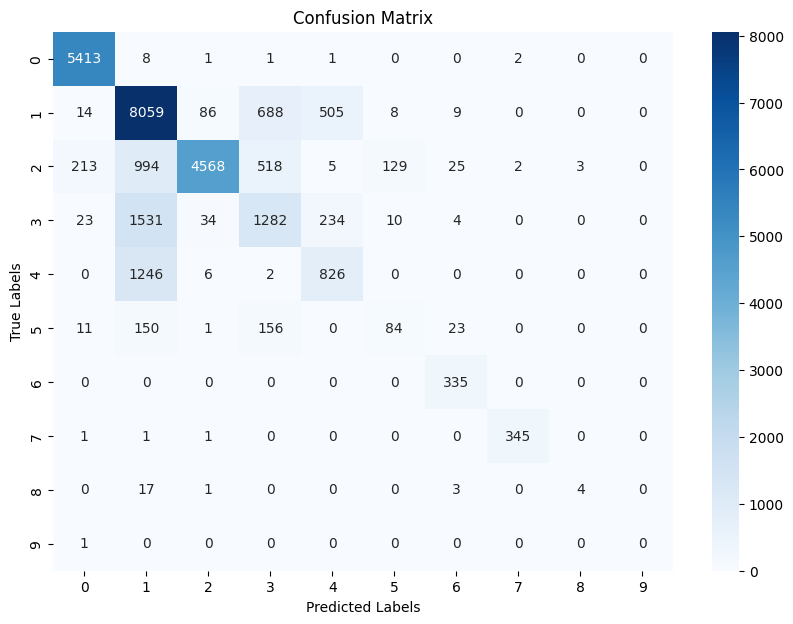

Start Round 11 ...
client_0: Loss = 0.4863, Accuracy = 0.773
client_1: Loss = 0.4928, Accuracy = 0.7736
client_2: Loss = 0.5004, Accuracy = 0.7718
client_3: Loss = 0.4861, Accuracy = 0.7756
client_4: Loss = 0.5287, Accuracy = 0.765
After round 11, train_loss = 0.5704, train_acc = 0.7453, dev_loss = 0.5719, dev_acc = 0.7435, test_loss = 0.5701, test_acc = 0.7477
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9957    0.9971     17935
           1     0.7135    0.7065    0.7100     31167
           2     0.8645    0.7576    0.8075     21701
           3     0.4807    0.4504    0.4651     10381
           4     0.4319    0.7054    0.5358      6559
           5     0.3577    0.2121    0.2663      1405
           6     0.8658    0.9983    0.9273      1189
           7     0.9844    0.9896    0.9870      1151
           8     0.4615    0.0741    0.1277        81
           9     0.0000    0.0000    0.0000        10

 

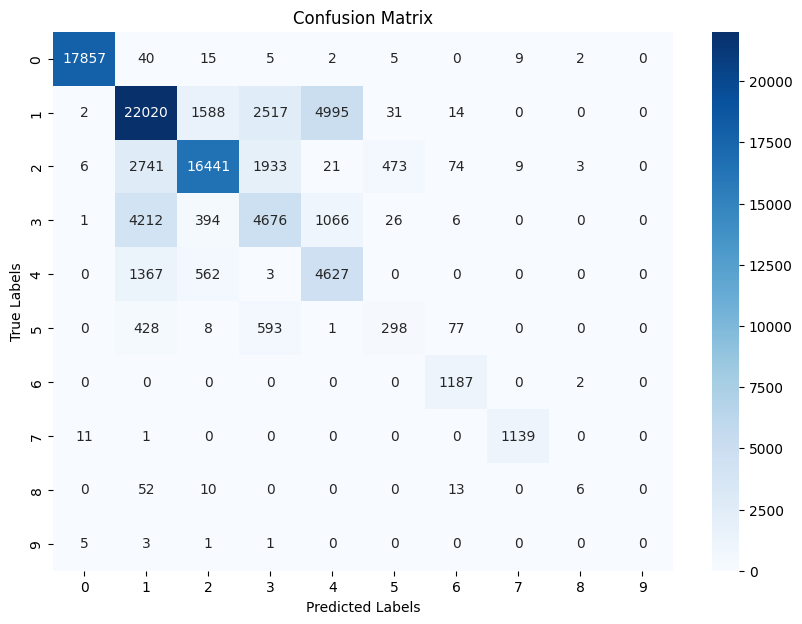

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9973    0.9967    0.9970      3666
           1     0.7057    0.7019    0.7038      6317
           2     0.8699    0.7636    0.8133      4476
           3     0.4807    0.4498    0.4647      2130
           4     0.4286    0.6893    0.5286      1355
           5     0.3636    0.2278    0.2802       316
           6     0.8728    1.0000    0.9321       247
           7     0.9780    0.9867    0.9823       225
           8     1.0000    0.0870    0.1600        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7432     18758
   macro avg     0.6697    0.5903    0.5862     18758
weighted avg     0.7563    0.7432    0.7459     18758



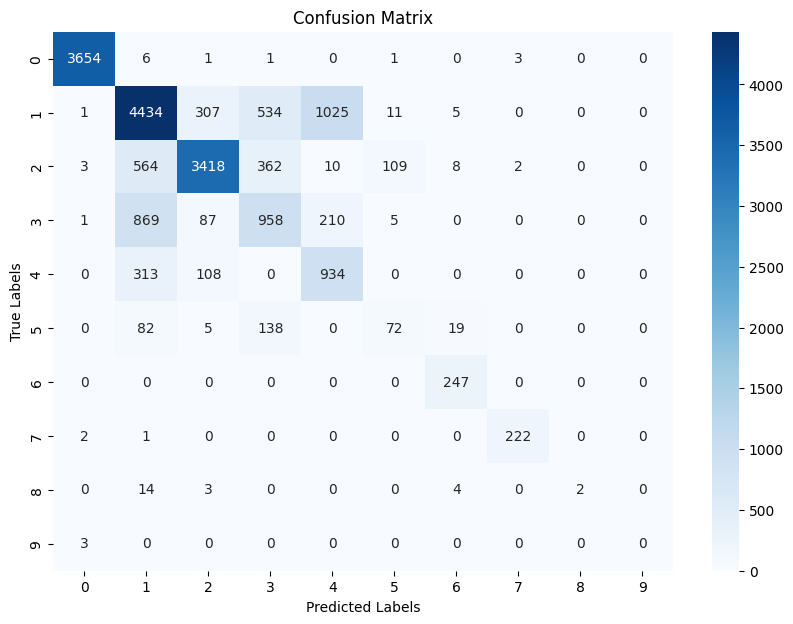

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9947    0.9970      5426
           1     0.7144    0.7075    0.7110      9369
           2     0.8728    0.7680    0.8170      6457
           3     0.4752    0.4448    0.4595      3118
           4     0.4467    0.7159    0.5502      2080
           5     0.3636    0.2071    0.2639       425
           6     0.8910    1.0000    0.9423       335
           7     0.9857    0.9914    0.9885       348
           8     1.0000    0.1200    0.2143        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7480     27584
   macro avg     0.6749    0.5949    0.5944     27584
weighted avg     0.7607    0.7480    0.7505     27584



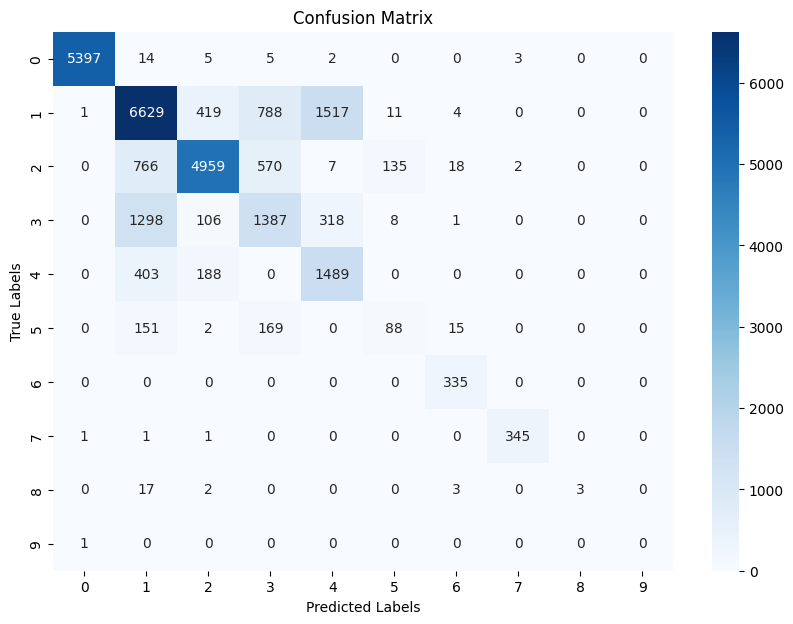

Start Round 12 ...
client_0: Loss = 0.4817, Accuracy = 0.775
client_1: Loss = 0.4891, Accuracy = 0.7728
client_2: Loss = 0.4929, Accuracy = 0.7732
client_3: Loss = 0.4713, Accuracy = 0.782
client_4: Loss = 0.4762, Accuracy = 0.7792
After round 12, train_loss = 0.4469, train_acc = 0.7923, dev_loss = 0.4567, dev_acc = 0.7860, test_loss = 0.4527, test_acc = 0.7882
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9985    0.9962    0.9973     17935
           1     0.7844    0.7631    0.7736     31167
           2     0.8624    0.8546    0.8585     21701
           3     0.4871    0.6367    0.5520     10381
           4     0.5831    0.5118    0.5451      6559
           5     0.8041    0.0555    0.1039      1405
           6     0.9133    0.9832    0.9469      1189
           7     0.9956    0.9887    0.9922      1151
           8     0.9412    0.1975    0.3265        81
           9     0.0000    0.0000    0.0000        10

 

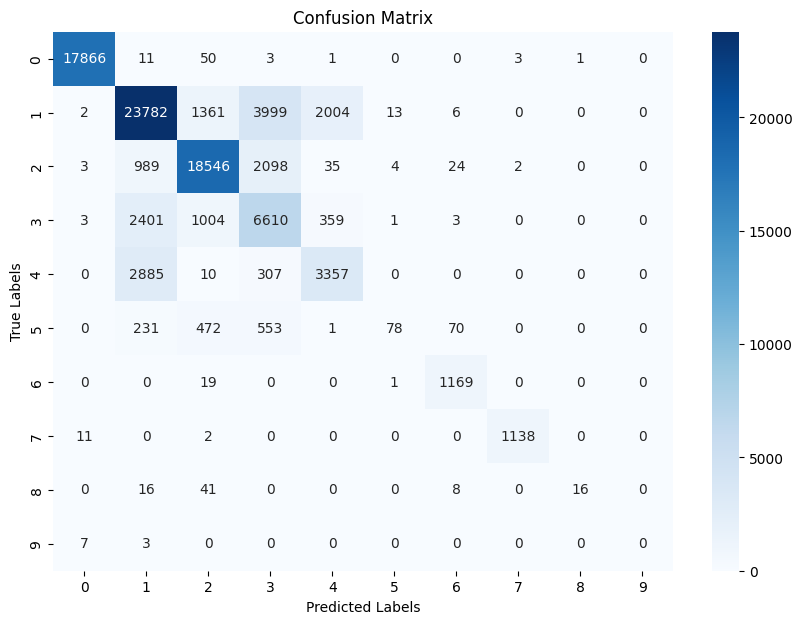

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9967    0.9965    0.9966      3666
           1     0.7712    0.7542    0.7626      6317
           2     0.8613    0.8548    0.8580      4476
           3     0.4859    0.6319    0.5494      2130
           4     0.5654    0.4945    0.5276      1355
           5     0.6364    0.0443    0.0828       316
           6     0.8893    0.9757    0.9305       247
           7     0.9910    0.9778    0.9843       225
           8     1.0000    0.1739    0.2963        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7857     18758
   macro avg     0.7197    0.5903    0.5988     18758
weighted avg     0.7916    0.7857    0.7826     18758



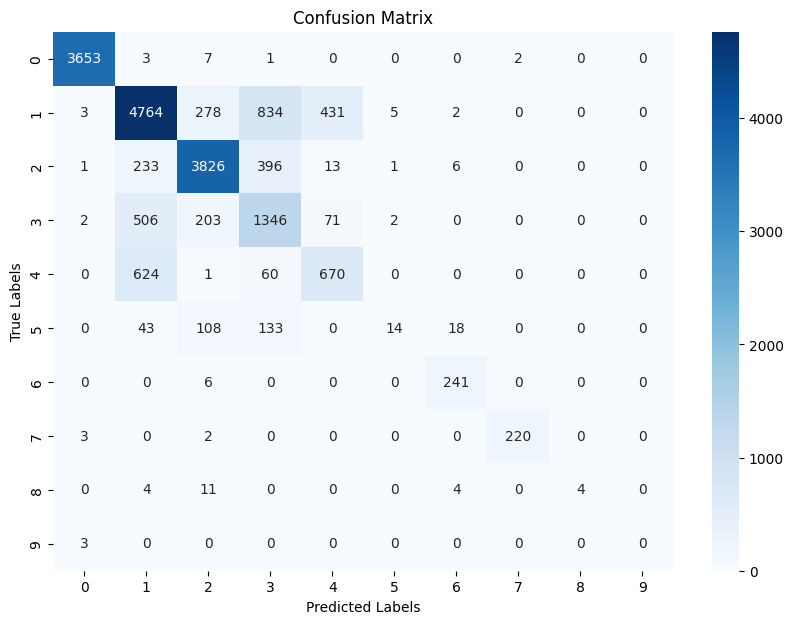

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9947    0.9970      5426
           1     0.7733    0.7568    0.7650      9369
           2     0.8623    0.8532    0.8577      6457
           3     0.4869    0.6366    0.5518      3118
           4     0.5883    0.5139    0.5486      2080
           5     0.8387    0.0612    0.1140       425
           6     0.9261    0.9731    0.9491       335
           7     0.9942    0.9885    0.9914       348
           8     1.0000    0.1600    0.2759        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7885     27584
   macro avg     0.7469    0.5938    0.6050     27584
weighted avg     0.7981    0.7885    0.7865     27584



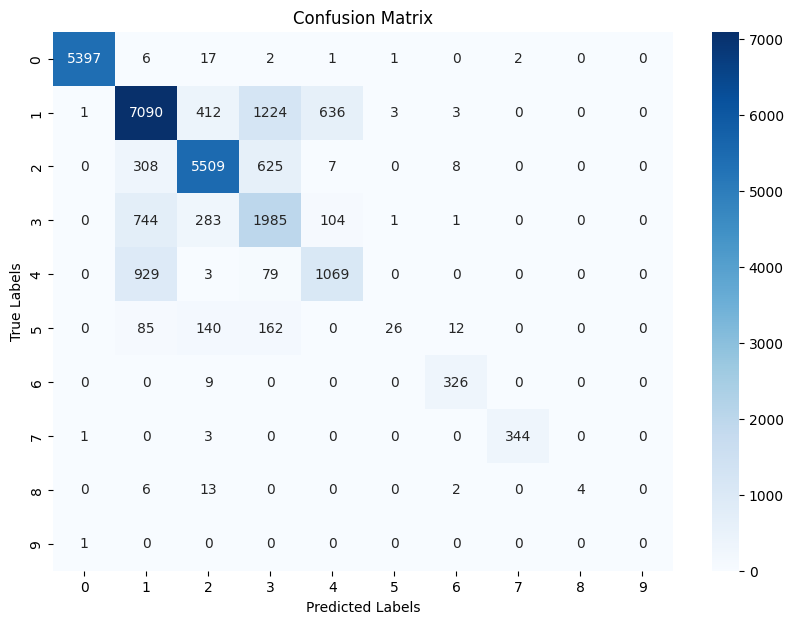

Start Round 13 ...
client_0: Loss = 0.6632, Accuracy = 0.749
client_1: Loss = 0.4723, Accuracy = 0.7796
client_2: Loss = 0.4825, Accuracy = 0.7784
client_3: Loss = 0.4762, Accuracy = 0.7805
client_4: Loss = 0.4733, Accuracy = 0.7799
After round 13, train_loss = 0.6026, train_acc = 0.7164, dev_loss = 0.6010, dev_acc = 0.7172, test_loss = 0.6013, test_acc = 0.7173
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9972    0.9979     17935
           1     0.8356    0.5196    0.6408     31167
           2     0.7725    0.7933    0.7827     21701
           3     0.4040    0.6785    0.5065     10381
           4     0.4062    0.7068    0.5159      6559
           5     0.4679    0.2021    0.2823      1405
           6     0.8644    0.9975    0.9262      1189
           7     0.9904    0.9904    0.9904      1151
           8     0.7778    0.2593    0.3889        81
           9     0.0000    0.0000    0.0000        10



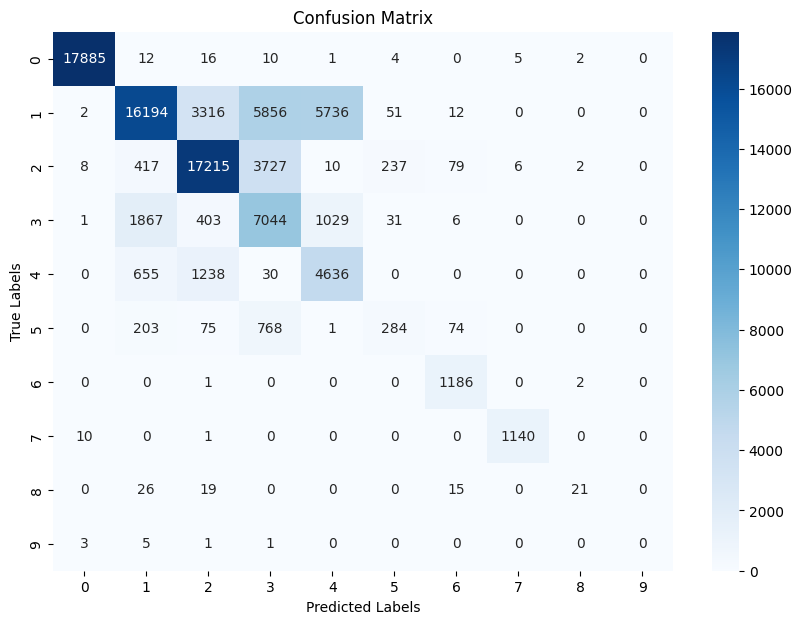

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9975    0.9975    0.9975      3666
           1     0.8332    0.5154    0.6369      6317
           2     0.7754    0.8045    0.7897      4476
           3     0.4081    0.6831    0.5110      2130
           4     0.4061    0.6959    0.5129      1355
           5     0.4815    0.2057    0.2882       316
           6     0.8606    1.0000    0.9251       247
           7     0.9823    0.9867    0.9845       225
           8     1.0000    0.2174    0.3571        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7171     18758
   macro avg     0.6745    0.6106    0.6003     18758
weighted avg     0.7687    0.7171    0.7222     18758



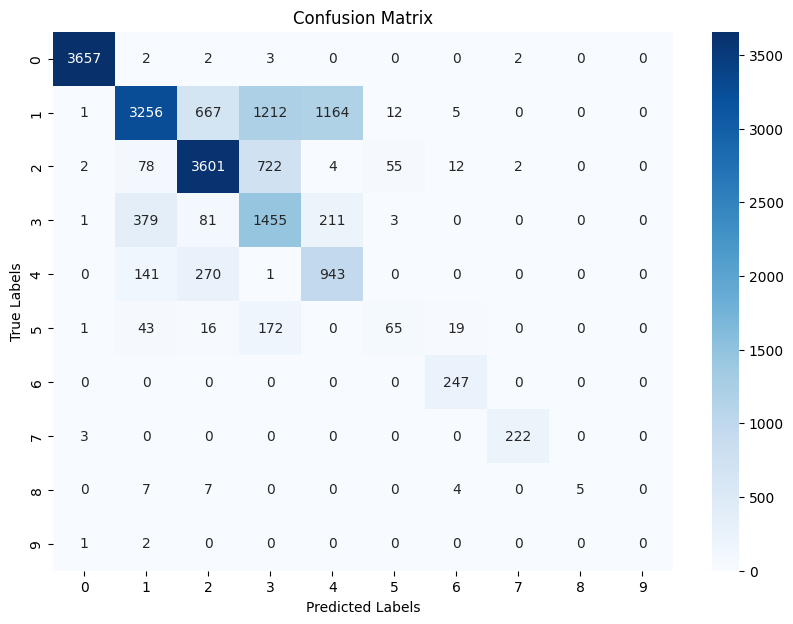

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9959    0.9977      5426
           1     0.8384    0.5239    0.6448      9369
           2     0.7716    0.7984    0.7847      6457
           3     0.4017    0.6713    0.5026      3118
           4     0.4151    0.7019    0.5217      2080
           5     0.4439    0.1953    0.2712       425
           6     0.8957    1.0000    0.9450       335
           7     0.9914    0.9914    0.9914       348
           8     1.0000    0.2000    0.3333        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7174     27584
   macro avg     0.6757    0.6078    0.5992     27584
weighted avg     0.7698    0.7174    0.7236     27584



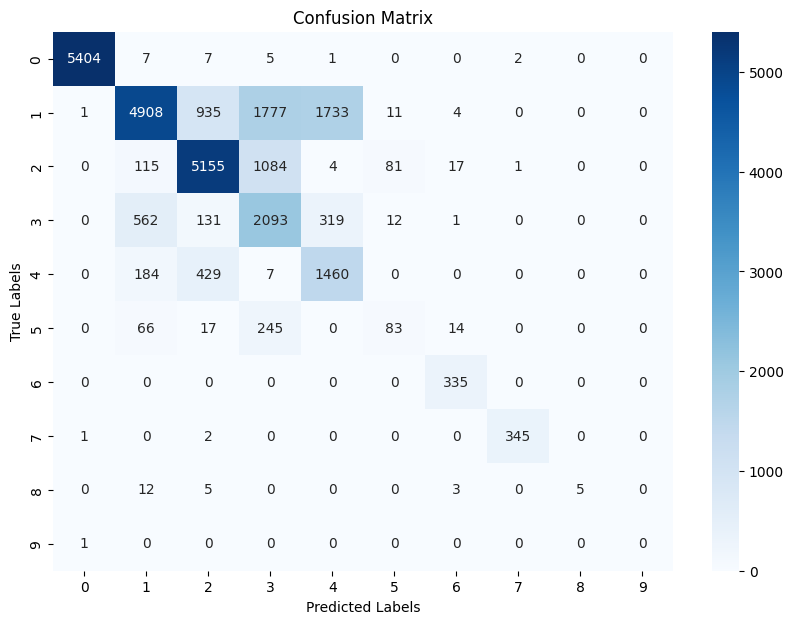

Start Round 14 ...
client_0: Loss = 0.4661, Accuracy = 0.7807
client_1: Loss = 0.4754, Accuracy = 0.7775
client_2: Loss = 0.4999, Accuracy = 0.7752
client_3: Loss = 0.4653, Accuracy = 0.7813
client_4: Loss = 0.4758, Accuracy = 0.7792
After round 14, train_loss = 0.4878, train_acc = 0.7744, dev_loss = 0.4909, dev_acc = 0.7733, test_loss = 0.4921, test_acc = 0.7754
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9951    0.9969     17935
           1     0.8454    0.6494    0.7346     31167
           2     0.8684    0.8295    0.8485     21701
           3     0.4629    0.6836    0.5520     10381
           4     0.4774    0.8030    0.5988      6559
           5     0.5967    0.1537    0.2445      1405
           6     0.9533    0.9277    0.9403      1189
           7     0.9956    0.9887    0.9922      1151
           8     0.9286    0.1605    0.2737        81
           9     0.0000    0.0000    0.0000        10


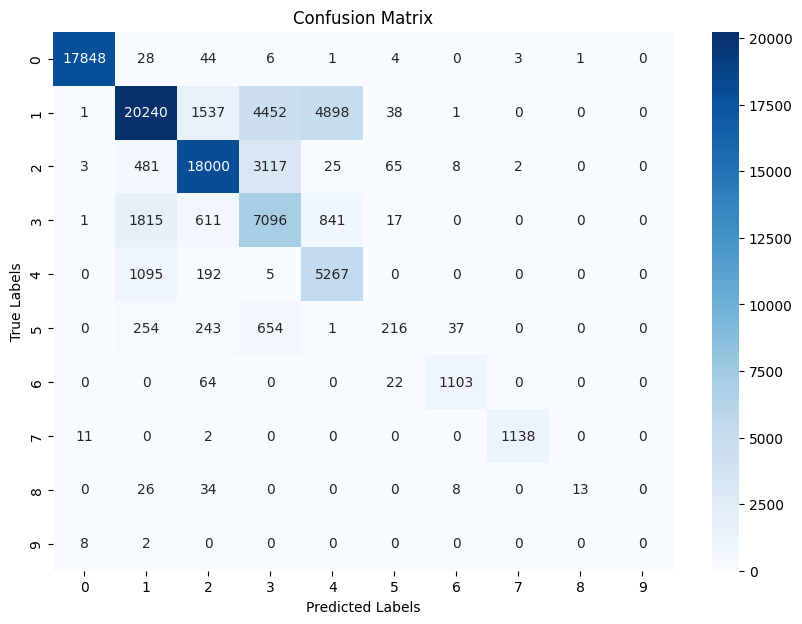

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9954    0.9967      3666
           1     0.8378    0.6502    0.7322      6317
           2     0.8682    0.8391    0.8534      4476
           3     0.4627    0.6728    0.5483      2130
           4     0.4808    0.7948    0.5992      1355
           5     0.5075    0.1076    0.1775       316
           6     0.9139    0.9028    0.9084       247
           7     0.9866    0.9822    0.9844       225
           8     1.0000    0.0870    0.1600        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7731     18758
   macro avg     0.7056    0.6032    0.5960     18758
weighted avg     0.8053    0.7731    0.7775     18758



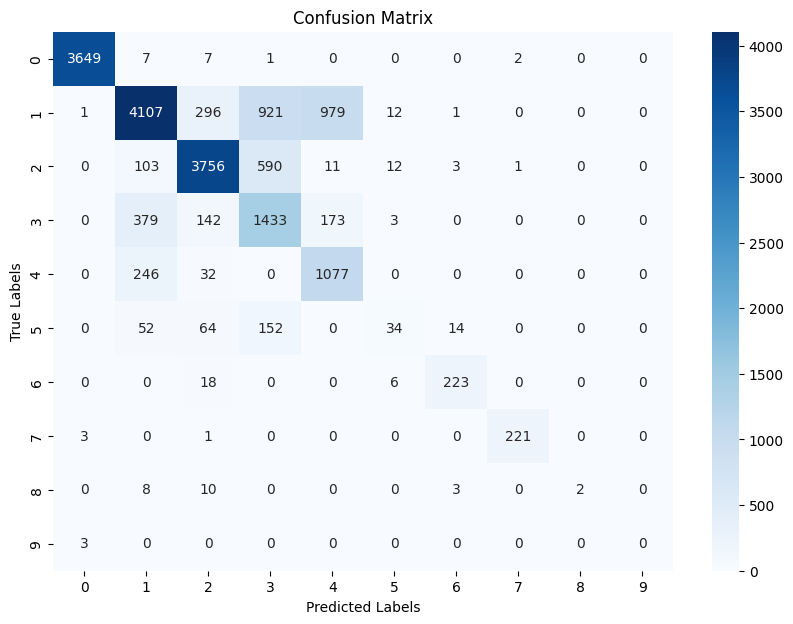

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9943    0.9969      5426
           1     0.8430    0.6517    0.7351      9369
           2     0.8692    0.8348    0.8516      6457
           3     0.4638    0.6774    0.5506      3118
           4     0.4910    0.8091    0.6111      2080
           5     0.6000    0.1412    0.2286       425
           6     0.9712    0.9045    0.9366       335
           7     0.9971    0.9885    0.9928       348
           8     1.0000    0.1200    0.2143        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7757     27584
   macro avg     0.7235    0.6121    0.6118     27584
weighted avg     0.8104    0.7757    0.7811     27584



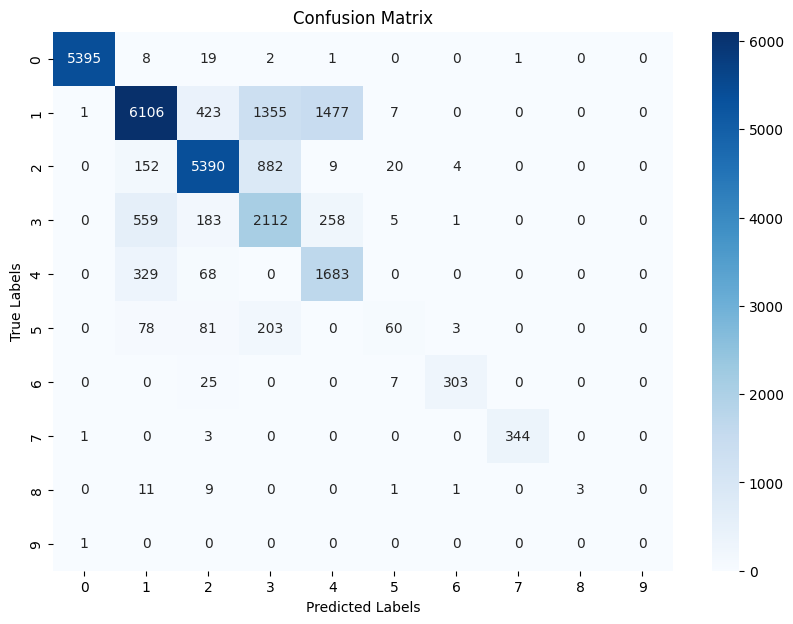

Start Round 15 ...
client_0: Loss = 0.4609, Accuracy = 0.7814
client_1: Loss = 0.4682, Accuracy = 0.7788
client_2: Loss = 0.4666, Accuracy = 0.7829
client_3: Loss = 0.5061, Accuracy = 0.7741
client_4: Loss = 0.4766, Accuracy = 0.7826
After round 15, train_loss = 0.4752, train_acc = 0.7808, dev_loss = 0.4847, dev_acc = 0.7760, test_loss = 0.4822, test_acc = 0.7786
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9936    0.9966     17935
           1     0.7694    0.7431    0.7560     31167
           2     0.9554    0.7664    0.8505     21701
           3     0.4544    0.7270    0.5593     10381
           4     0.5655    0.5675    0.5665      6559
           5     0.5145    0.2021    0.2902      1405
           6     0.8910    0.9966    0.9408      1189
           7     0.9862    0.9904    0.9883      1151
           8     0.8889    0.1975    0.3232        81
           9     0.0000    0.0000    0.0000        10


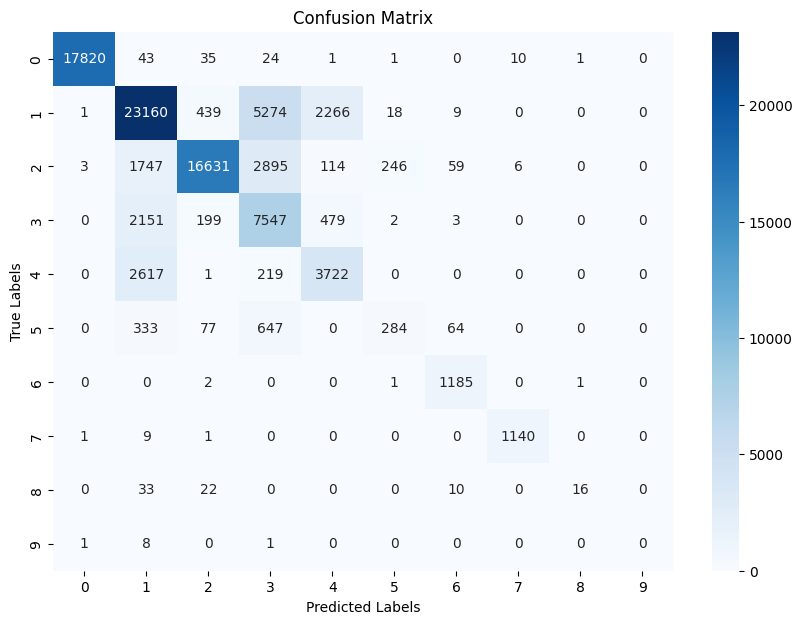

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9951    0.9970      3666
           1     0.7604    0.7331    0.7465      6317
           2     0.9555    0.7668    0.8508      4476
           3     0.4566    0.7376    0.5640      2130
           4     0.5461    0.5424    0.5442      1355
           5     0.4851    0.2057    0.2889       316
           6     0.8905    0.9879    0.9367       247
           7     0.9867    0.9867    0.9867       225
           8     1.0000    0.1739    0.2963        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7758     18758
   macro avg     0.7080    0.6129    0.6211     18758
weighted avg     0.8035    0.7758    0.7820     18758



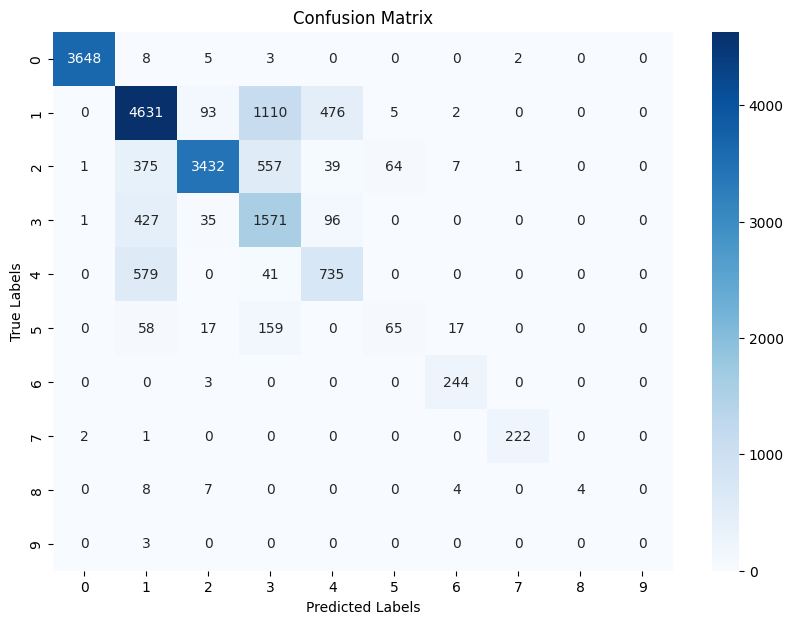

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9915    0.9956      5426
           1     0.7611    0.7396    0.7502      9369
           2     0.9588    0.7713    0.8549      6457
           3     0.4550    0.7191    0.5573      3118
           4     0.5664    0.5702    0.5683      2080
           5     0.5091    0.1976    0.2847       425
           6     0.9126    0.9970    0.9529       335
           7     0.9942    0.9914    0.9928       348
           8     1.0000    0.1600    0.2759        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7789     27584
   macro avg     0.7157    0.6138    0.6233     27584
weighted avg     0.8061    0.7789    0.7853     27584



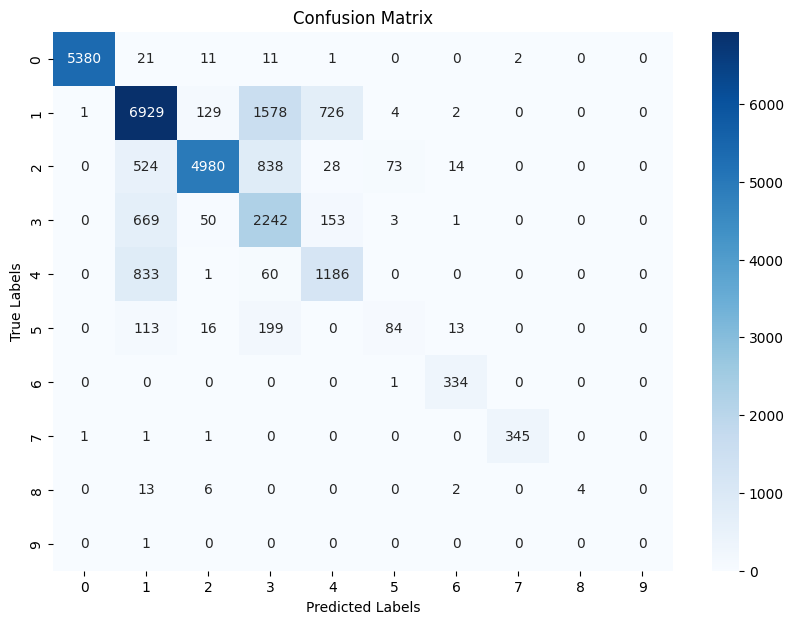

Start Round 16 ...
client_0: Loss = 0.4624, Accuracy = 0.7841
client_1: Loss = 0.4687, Accuracy = 0.782
client_2: Loss = 0.4699, Accuracy = 0.7813
client_3: Loss = 0.508, Accuracy = 0.7766
client_4: Loss = 0.4511, Accuracy = 0.788
After round 16, train_loss = 0.4393, train_acc = 0.7942, dev_loss = 0.4492, dev_acc = 0.7857, test_loss = 0.4459, test_acc = 0.7910
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9988    0.9965    0.9977     17935
           1     0.8297    0.7135    0.7672     31167
           2     0.8554    0.8713    0.8632     21701
           3     0.4733    0.7220    0.5718     10381
           4     0.5992    0.5588    0.5783      6559
           5     0.6011    0.1566    0.2484      1405
           6     0.9078    0.9941    0.9490      1189
           7     0.9956    0.9887    0.9922      1151
           8     1.0000    0.1852    0.3125        81
           9     0.0000    0.0000    0.0000        10

  

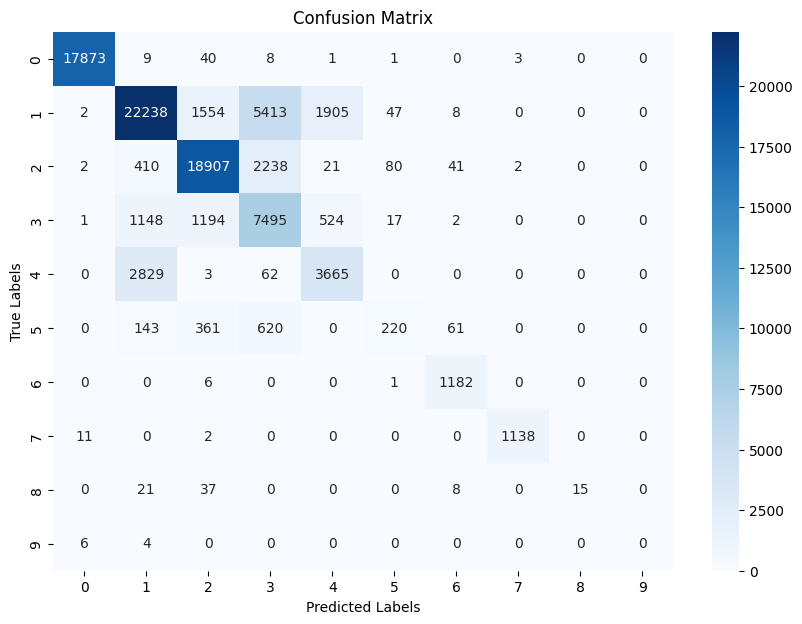

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9965    0.9971      3666
           1     0.8120    0.7041    0.7542      6317
           2     0.8568    0.8677    0.8622      4476
           3     0.4641    0.7141    0.5626      2130
           4     0.5800    0.5269    0.5522      1355
           5     0.5949    0.1487    0.2380       316
           6     0.8938    0.9879    0.9385       247
           7     0.9865    0.9778    0.9821       225
           8     1.0000    0.1304    0.2308        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7855     18758
   macro avg     0.7186    0.6054    0.6118     18758
weighted avg     0.8024    0.7855    0.7868     18758



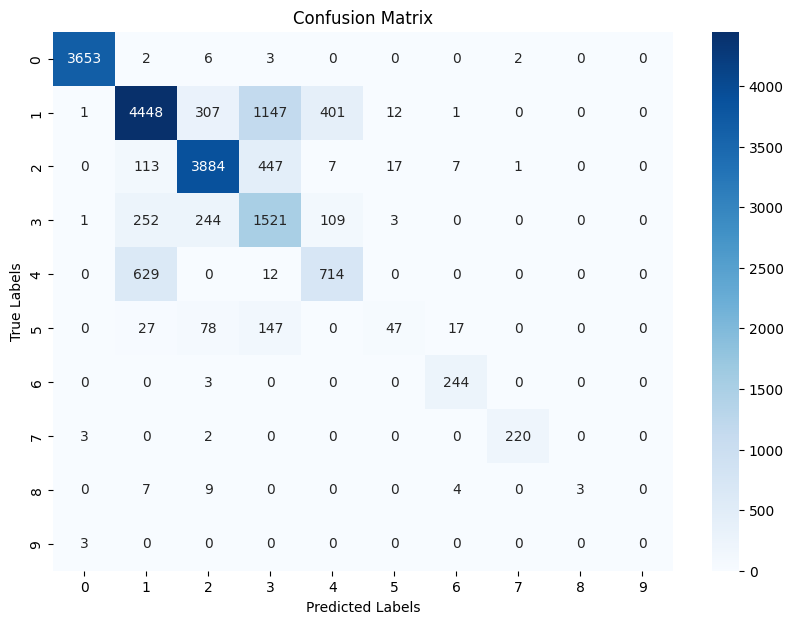

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9952    0.9973      5426
           1     0.8198    0.7119    0.7621      9369
           2     0.8567    0.8719    0.8642      6457
           3     0.4738    0.7203    0.5716      3118
           4     0.5962    0.5481    0.5711      2080
           5     0.5688    0.1459    0.2322       425
           6     0.9176    0.9970    0.9557       335
           7     0.9971    0.9885    0.9928       348
           8     1.0000    0.1200    0.2143        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7914     27584
   macro avg     0.7229    0.6099    0.6161     27584
weighted avg     0.8075    0.7914    0.7929     27584



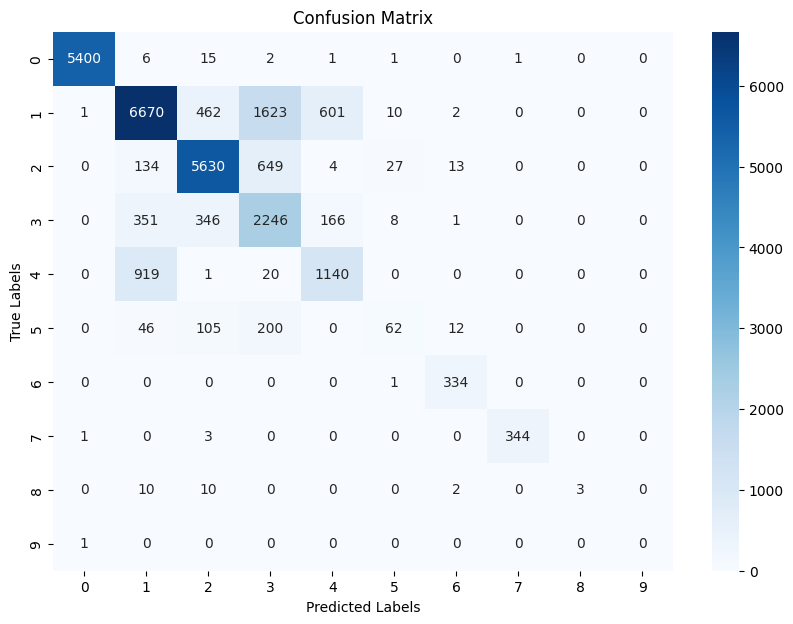

Start Round 17 ...
client_0: Loss = 0.4573, Accuracy = 0.7845
client_1: Loss = 0.4588, Accuracy = 0.7846
client_2: Loss = 0.459, Accuracy = 0.7842
client_3: Loss = 0.4521, Accuracy = 0.7878
client_4: Loss = 0.4561, Accuracy = 0.7856
After round 17, train_loss = 0.4488, train_acc = 0.7938, dev_loss = 0.4547, dev_acc = 0.7895, test_loss = 0.4543, test_acc = 0.7904
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9988    0.9971    0.9979     17935
           1     0.7265    0.8392    0.7788     31167
           2     0.9512    0.7896    0.8629     21701
           3     0.4990    0.6239    0.5545     10381
           4     0.6354    0.3950    0.4872      6559
           5     0.7939    0.0740    0.1354      1405
           6     0.9156    0.9941    0.9532      1189
           7     0.9930    0.9922    0.9926      1151
           8     0.8750    0.2593    0.4000        81
           9     0.0000    0.0000    0.0000        10



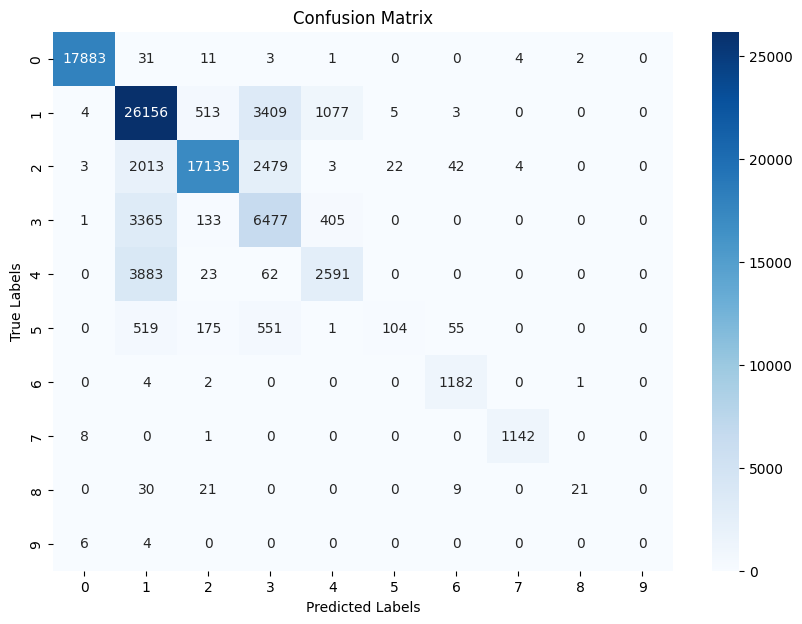

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9967    0.9974      3666
           1     0.7203    0.8322    0.7722      6317
           2     0.9487    0.7976    0.8666      4476
           3     0.4976    0.6258    0.5544      2130
           4     0.6099    0.3727    0.4627      1355
           5     0.6786    0.0601    0.1105       316
           6     0.8967    0.9838    0.9382       247
           7     0.9867    0.9867    0.9867       225
           8     1.0000    0.2174    0.3571        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7894     18758
   macro avg     0.7337    0.5873    0.6046     18758
weighted avg     0.8009    0.7894    0.7846     18758



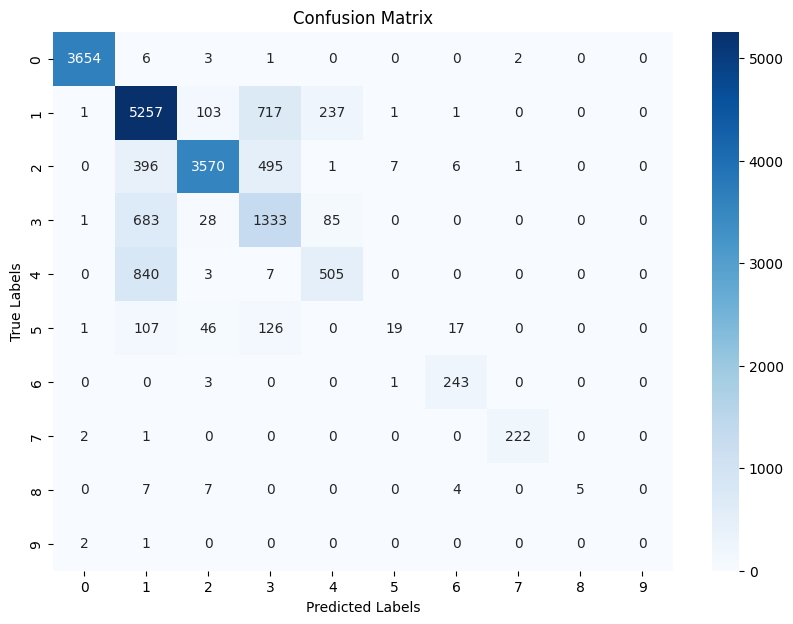

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9963    0.9979      5426
           1     0.7180    0.8357    0.7724      9369
           2     0.9558    0.7928    0.8667      6457
           3     0.5017    0.6206    0.5548      3118
           4     0.6212    0.3894    0.4787      2080
           5     0.5814    0.0588    0.1068       425
           6     0.9330    0.9970    0.9639       335
           7     0.9971    0.9885    0.9928       348
           8     1.0000    0.2400    0.3871        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7906     27584
   macro avg     0.7307    0.5919    0.6121     27584
weighted avg     0.8015    0.7906    0.7866     27584



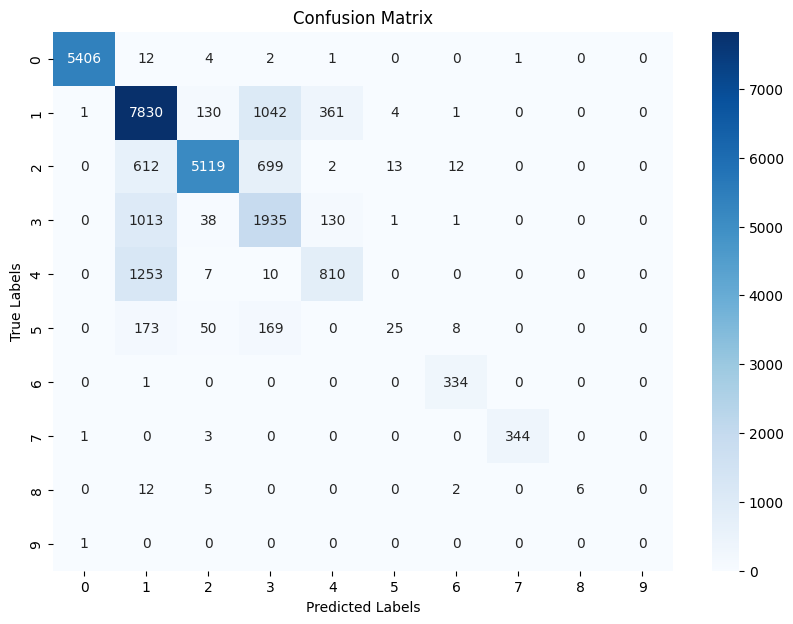

Start Round 18 ...
client_0: Loss = 0.454, Accuracy = 0.788
client_1: Loss = 0.4677, Accuracy = 0.78
client_2: Loss = 0.5735, Accuracy = 0.7709
client_3: Loss = 0.446, Accuracy = 0.7912
client_4: Loss = 0.4626, Accuracy = 0.7854
After round 18, train_loss = 0.4776, train_acc = 0.7789, dev_loss = 0.4838, dev_acc = 0.7761, test_loss = 0.4819, test_acc = 0.7759
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9939    0.9966     17935
           1     0.7082    0.8382    0.7677     31167
           2     0.8453    0.8395    0.8424     21701
           3     0.4910    0.4953    0.4931     10381
           4     0.7179    0.2316    0.3502      6559
           5     0.7784    0.1075    0.1889      1405
           6     0.9149    0.9941    0.9528      1189
           7     0.9615    0.9974    0.9791      1151
           8     0.8788    0.3580    0.5088        81
           9     0.0000    0.0000    0.0000        10

    

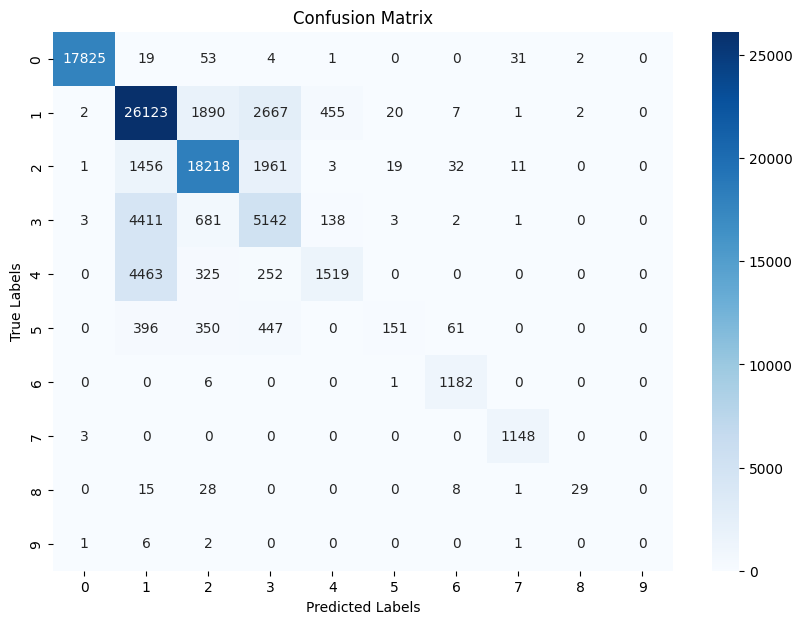

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9926    0.9956      3666
           1     0.7015    0.8338    0.7620      6317
           2     0.8503    0.8467    0.8485      4476
           3     0.4886    0.4934    0.4910      2130
           4     0.6892    0.2258    0.3402      1355
           5     0.6585    0.0854    0.1513       316
           6     0.8967    0.9838    0.9382       247
           7     0.9530    0.9911    0.9717       225
           8     1.0000    0.3478    0.5161        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7759     18758
   macro avg     0.7237    0.5801    0.6015     18758
weighted avg     0.7751    0.7759    0.7612     18758



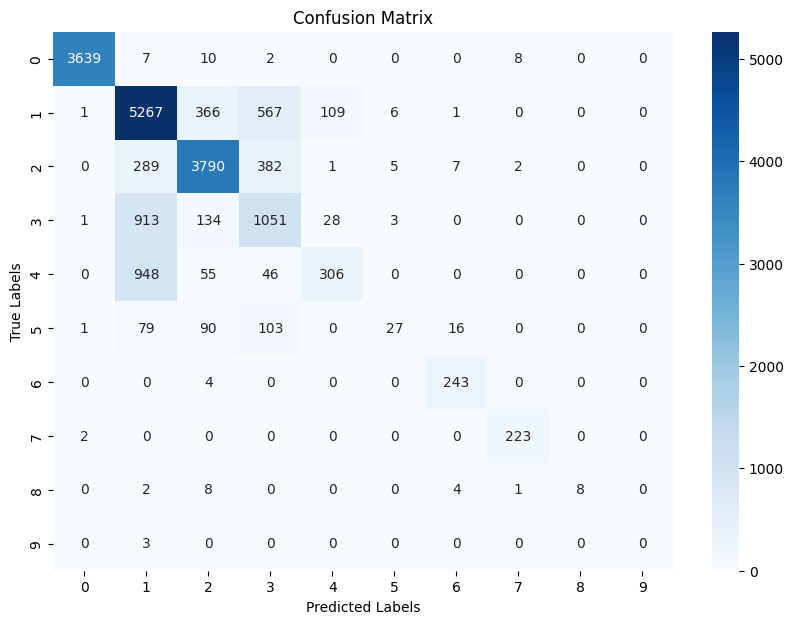

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9932    0.9965      5426
           1     0.7008    0.8404    0.7643      9369
           2     0.8489    0.8423    0.8456      6457
           3     0.4876    0.4862    0.4869      3118
           4     0.6995    0.2216    0.3366      2080
           5     0.6935    0.1012    0.1766       425
           6     0.9248    0.9910    0.9568       335
           7     0.9719    0.9943    0.9830       348
           8     1.0000    0.2800    0.4375        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7761     27584
   macro avg     0.7327    0.5750    0.5984     27584
weighted avg     0.7764    0.7761    0.7611     27584



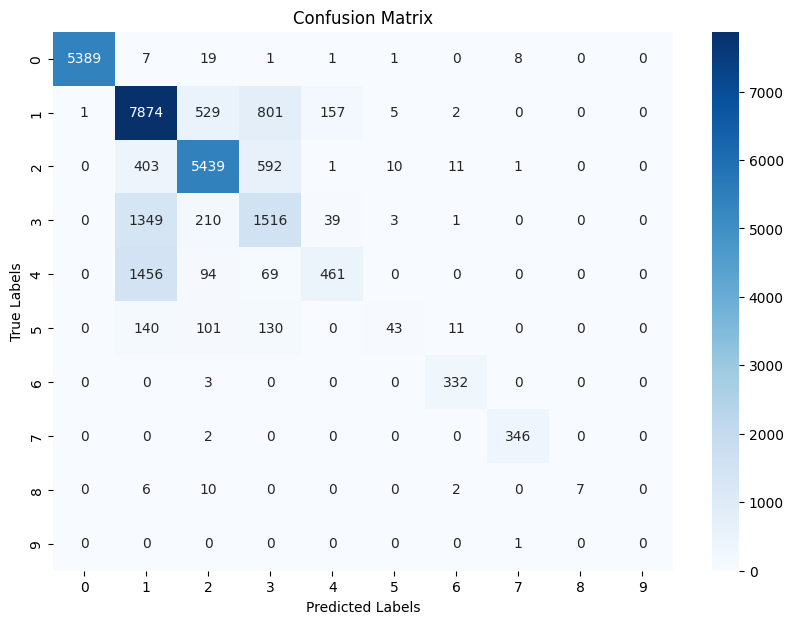

Start Round 19 ...
client_0: Loss = 0.4469, Accuracy = 0.789
client_1: Loss = 0.4714, Accuracy = 0.7816
client_2: Loss = 0.4623, Accuracy = 0.7862
client_3: Loss = 0.4378, Accuracy = 0.7909
client_4: Loss = 0.4481, Accuracy = 0.7907
After round 19, train_loss = 0.4505, train_acc = 0.7901, dev_loss = 0.4562, dev_acc = 0.7887, test_loss = 0.4545, test_acc = 0.7904
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9983    0.9981    0.9982     17935
           1     0.8580    0.6782    0.7576     31167
           2     0.8841    0.8340    0.8583     21701
           3     0.4655    0.7313    0.5689     10381
           4     0.5362    0.7834    0.6366      6559
           5     0.7949    0.1103    0.1938      1405
           6     0.9149    0.9941    0.9528      1189
           7     0.9922    0.9896    0.9909      1151
           8     1.0000    0.1975    0.3299        81
           9     0.0000    0.0000    0.0000        10



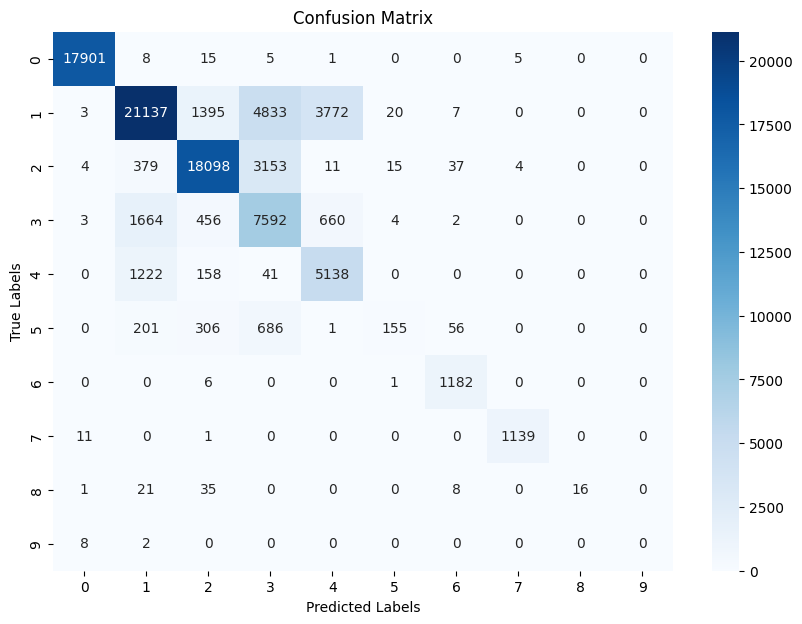

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9973    0.9975    0.9974      3666
           1     0.8489    0.6785    0.7542      6317
           2     0.8883    0.8400    0.8635      4476
           3     0.4617    0.7225    0.5634      2130
           4     0.5445    0.7771    0.6403      1355
           5     0.6585    0.0854    0.1513       316
           6     0.8971    0.9879    0.9403       247
           7     0.9867    0.9867    0.9867       225
           8     1.0000    0.1739    0.2963        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7886     18758
   macro avg     0.7283    0.6250    0.6193     18758
weighted avg     0.8205    0.7886    0.7923     18758



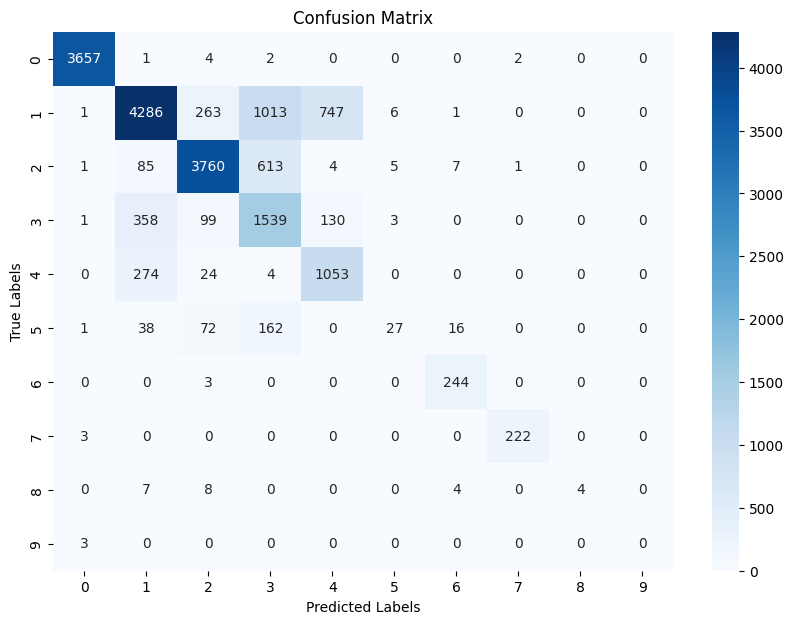

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9965    0.9980      5426
           1     0.8548    0.6795    0.7571      9369
           2     0.8831    0.8366    0.8592      6457
           3     0.4656    0.7239    0.5667      3118
           4     0.5516    0.7918    0.6502      2080
           5     0.7246    0.1176    0.2024       425
           6     0.9302    0.9940    0.9610       335
           7     0.9971    0.9885    0.9928       348
           8     1.0000    0.2000    0.3333        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7907     27584
   macro avg     0.7407    0.6328    0.6321     27584
weighted avg     0.8238    0.7907    0.7953     27584



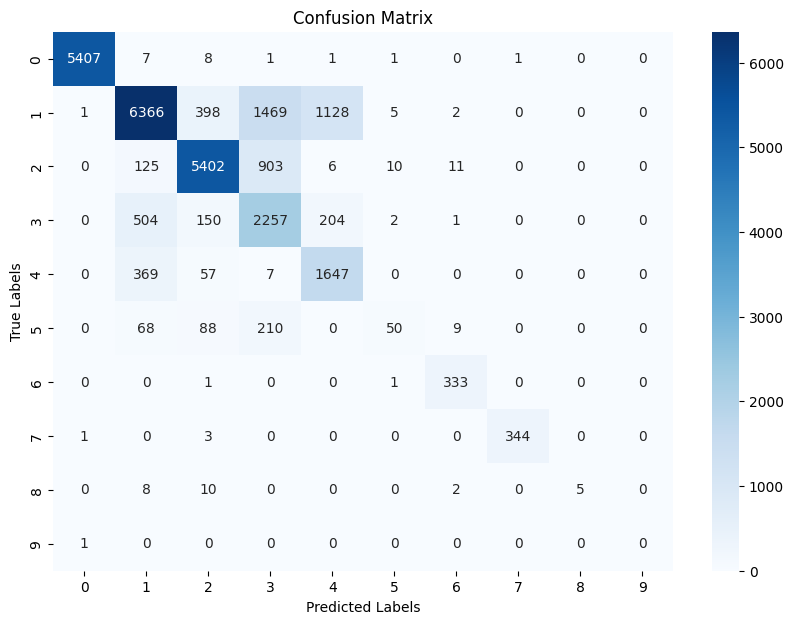

Start Round 20 ...
client_0: Loss = 0.4484, Accuracy = 0.7914
client_1: Loss = 0.4453, Accuracy = 0.7874
client_2: Loss = 0.4453, Accuracy = 0.7898
client_3: Loss = 0.4436, Accuracy = 0.7944
client_4: Loss = 0.4407, Accuracy = 0.7935
After round 20, train_loss = 0.6207, train_acc = 0.7501, dev_loss = 0.6430, dev_acc = 0.7461, test_loss = 0.6317, test_acc = 0.7466
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9975    0.9983     17935
           1     0.6228    0.9317    0.7466     31167
           2     0.7977    0.8416    0.8190     21701
           3     0.6854    0.0718    0.1299     10381
           4     0.6396    0.0528    0.0975      6559
           5     0.8545    0.0669    0.1241      1405
           6     0.9304    0.9554    0.9427      1189
           7     0.9922    0.9922    0.9922      1151
           8     0.8095    0.4198    0.5528        81
           9     0.0000    0.0000    0.0000        10


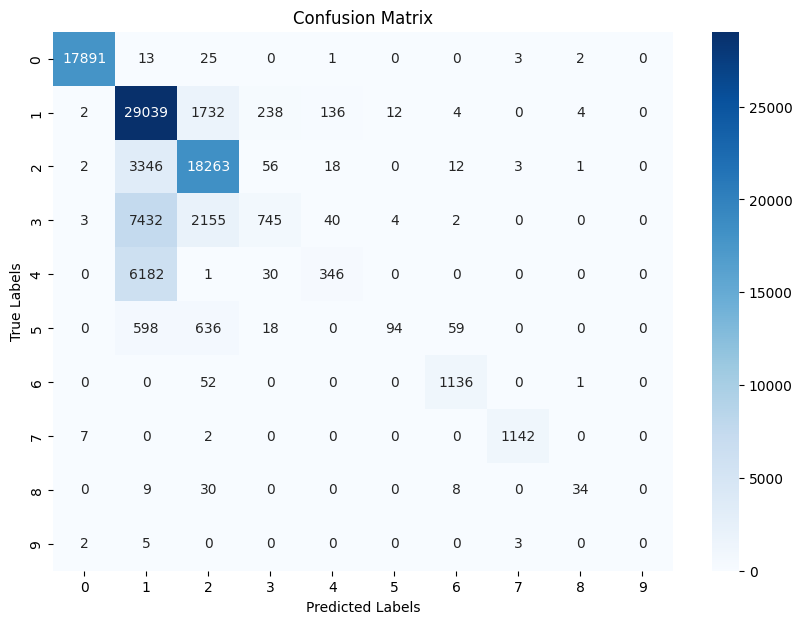

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9970    0.9975      3666
           1     0.6175    0.9318    0.7428      6317
           2     0.7970    0.8412    0.8185      4476
           3     0.6286    0.0620    0.1128      2130
           4     0.6121    0.0524    0.0965      1355
           5     0.7500    0.0475    0.0893       316
           6     0.9077    0.9555    0.9310       247
           7     0.9866    0.9822    0.9844       225
           8     0.8000    0.3478    0.4848        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7458     18758
   macro avg     0.7098    0.5217    0.5258     18758
weighted avg     0.7462    0.7458    0.6863     18758



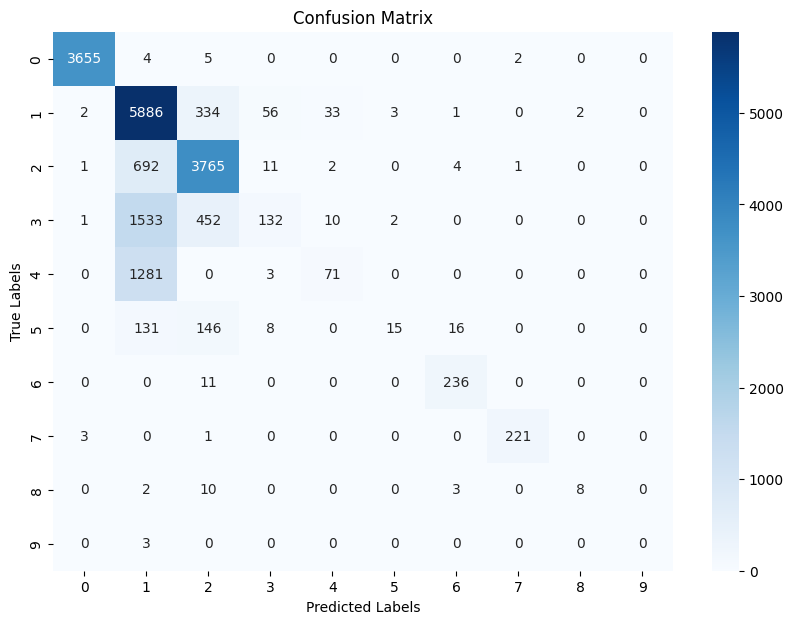

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9959    0.9977      5426
           1     0.6168    0.9298    0.7416      9369
           2     0.7985    0.8468    0.8219      6457
           3     0.6605    0.0686    0.1243      3118
           4     0.6538    0.0490    0.0912      2080
           5     0.8286    0.0682    0.1261       425
           6     0.9485    0.9343    0.9414       335
           7     0.9971    0.9885    0.9928       348
           8     0.6667    0.4000    0.5000        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7466     27584
   macro avg     0.7170    0.5281    0.5337     27584
weighted avg     0.7544    0.7466    0.6878     27584



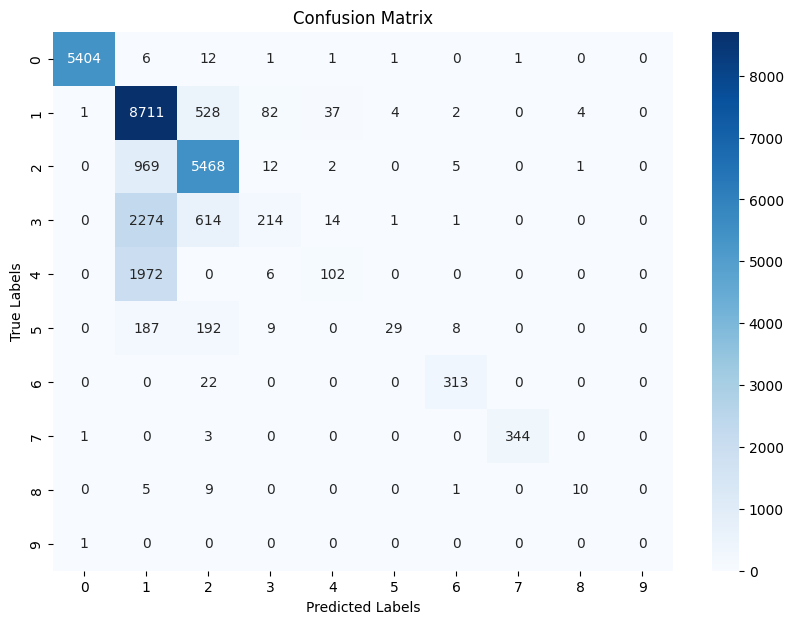

Start Round 21 ...
client_0: Loss = 0.5682, Accuracy = 0.768
client_1: Loss = 0.4494, Accuracy = 0.7884
client_2: Loss = 0.447, Accuracy = 0.7916
client_3: Loss = 0.4293, Accuracy = 0.7971
client_4: Loss = 0.4448, Accuracy = 0.794
After round 21, train_loss = 0.4212, train_acc = 0.7990, dev_loss = 0.4312, dev_acc = 0.7927, test_loss = 0.4262, test_acc = 0.7989
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9977    0.9986    0.9981     17935
           1     0.7261    0.8521    0.7841     31167
           2     0.8343    0.8839    0.8584     21701
           3     0.5819    0.4078    0.4795     10381
           4     0.6870    0.4263    0.5261      6559
           5     0.7637    0.0989    0.1752      1405
           6     0.8759    0.9975    0.9328      1189
           7     0.9948    0.9878    0.9913      1151
           8     0.8250    0.4074    0.5455        81
           9     0.0000    0.0000    0.0000        10

  

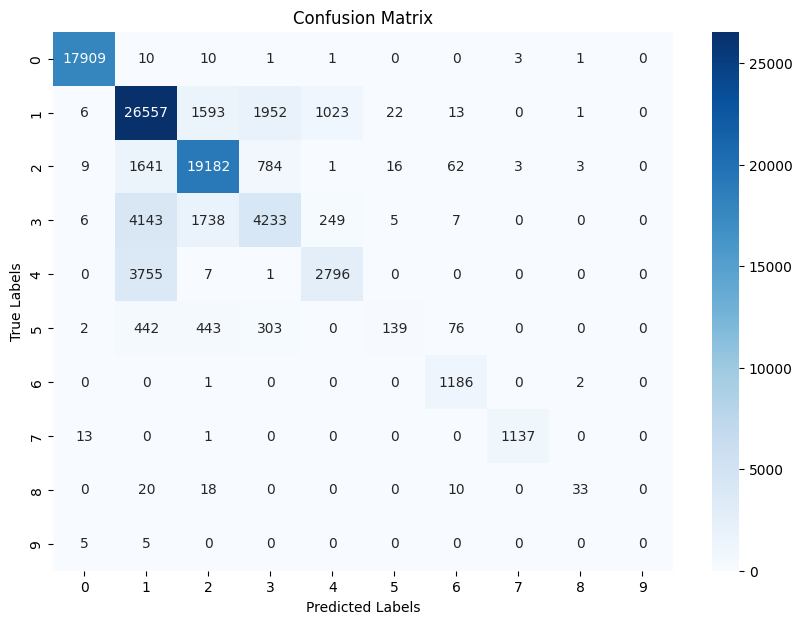

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9965    0.9984    0.9974      3666
           1     0.7164    0.8403    0.7734      6317
           2     0.8331    0.8840    0.8578      4476
           3     0.5718    0.4056    0.4746      2130
           4     0.6647    0.4214    0.5158      1355
           5     0.7209    0.0981    0.1727       316
           6     0.8746    0.9879    0.9278       247
           7     0.9866    0.9822    0.9844       225
           8     0.7000    0.3043    0.4242        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7924     18758
   macro avg     0.7065    0.5922    0.6128     18758
weighted avg     0.7841    0.7924    0.7787     18758



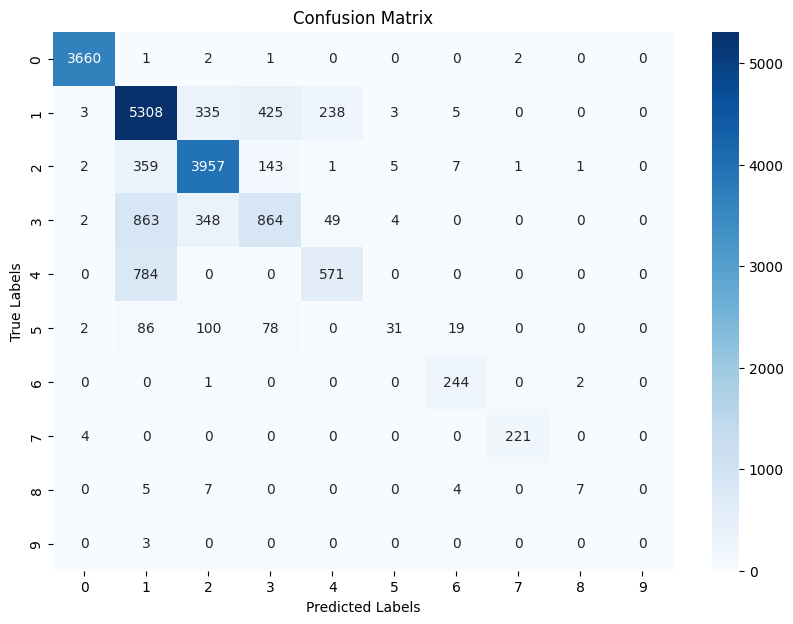

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9971    0.9980      5426
           1     0.7218    0.8505    0.7809      9369
           2     0.8382    0.8851    0.8610      6457
           3     0.5912    0.4230    0.4932      3118
           4     0.6880    0.4293    0.5287      2080
           5     0.7679    0.1012    0.1788       425
           6     0.9054    1.0000    0.9504       335
           7     1.0000    0.9885    0.9942       348
           8     1.0000    0.4800    0.6486        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7990     27584
   macro avg     0.7511    0.6155    0.6434     27584
weighted avg     0.7929    0.7990    0.7861     27584



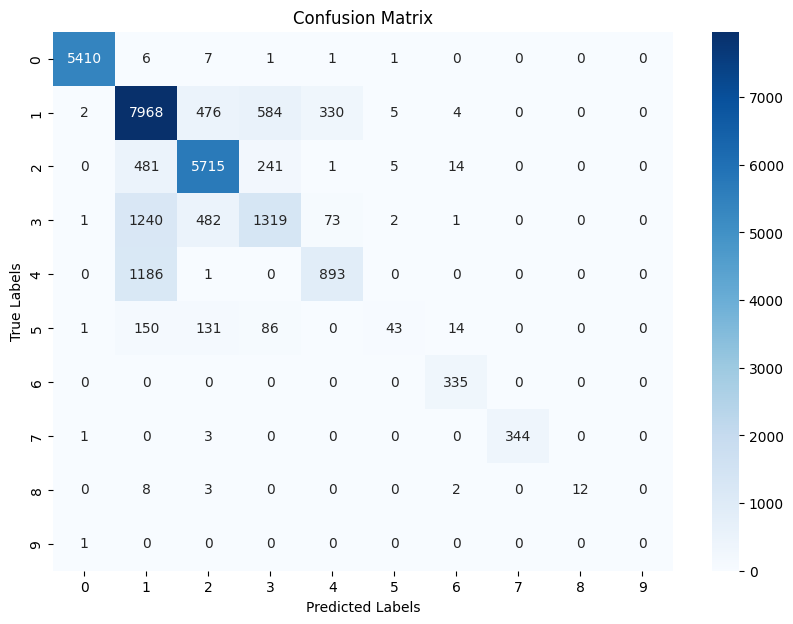

Start Round 22 ...
client_0: Loss = 0.4381, Accuracy = 0.7899
client_1: Loss = 0.443, Accuracy = 0.79
client_2: Loss = 0.4439, Accuracy = 0.79
client_3: Loss = 0.4423, Accuracy = 0.7893
client_4: Loss = 0.4336, Accuracy = 0.7932
After round 22, train_loss = 0.4838, train_acc = 0.7727, dev_loss = 0.5018, dev_acc = 0.7660, test_loss = 0.4918, test_acc = 0.7699
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9977    0.9990    0.9983     17935
           1     0.6513    0.9065    0.7580     31167
           2     0.8690    0.8131    0.8401     21701
           3     0.6044    0.3665    0.4563     10381
           4     0.7120    0.1014    0.1775      6559
           5     0.8092    0.0754    0.1380      1405
           6     0.8889    0.9958    0.9393      1189
           7     0.9939    0.9896    0.9917      1151
           8     0.5269    0.6049    0.5632        81
           9     0.0000    0.0000    0.0000        10

    

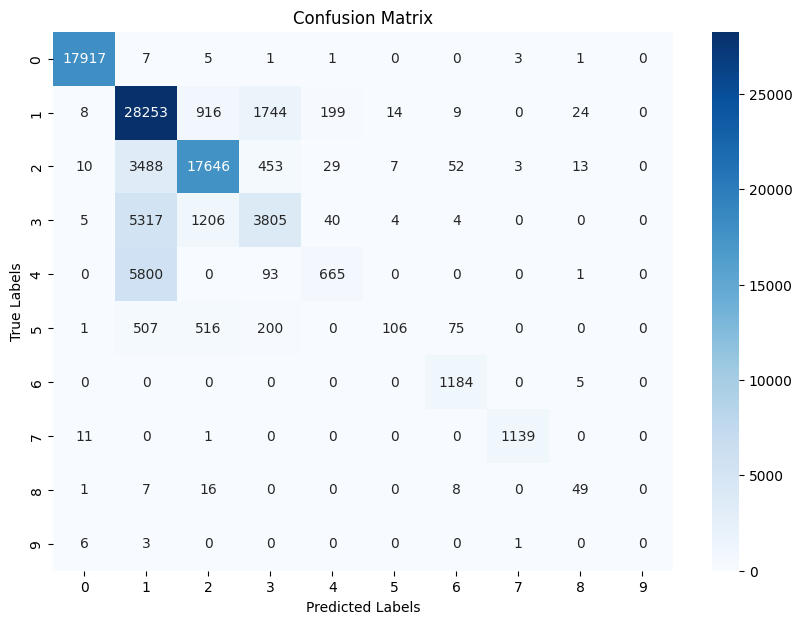

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9951    0.9986    0.9969      3666
           1     0.6441    0.9022    0.7516      6317
           2     0.8622    0.8150    0.8379      4476
           3     0.5800    0.3437    0.4316      2130
           4     0.6545    0.0923    0.1617      1355
           5     0.7500    0.0665    0.1221       316
           6     0.8746    0.9879    0.9278       247
           7     0.9910    0.9822    0.9866       225
           8     0.6471    0.4783    0.5500        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7656     18758
   macro avg     0.6999    0.5667    0.5766     18758
weighted avg     0.7671    0.7656    0.7354     18758



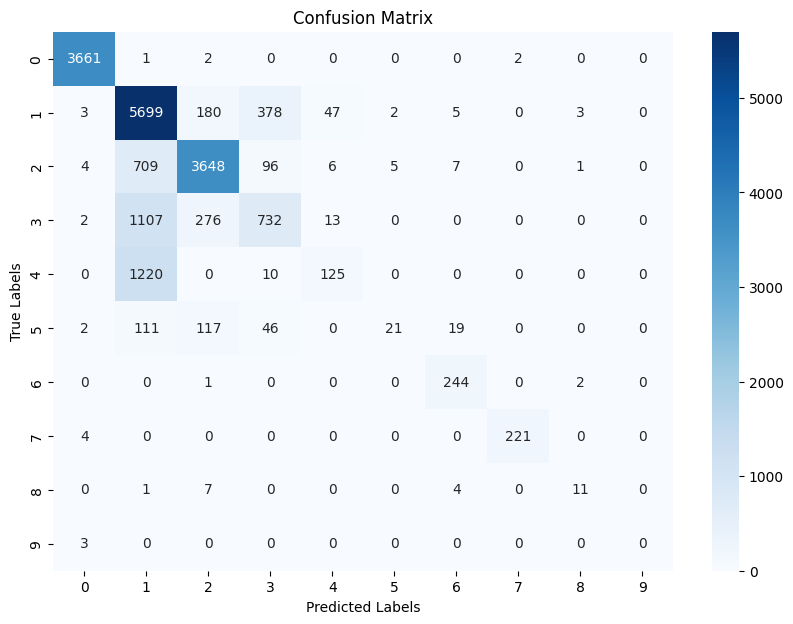

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9972    0.9980      5426
           1     0.6471    0.9043    0.7543      9369
           2     0.8658    0.8166    0.8405      6457
           3     0.5979    0.3643    0.4528      3118
           4     0.7023    0.1010    0.1765      2080
           5     0.8043    0.0871    0.1571       425
           6     0.9103    1.0000    0.9531       335
           7     1.0000    0.9885    0.9942       348
           8     0.5769    0.6000    0.5882        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7698     27584
   macro avg     0.7103    0.5859    0.5915     27584
weighted avg     0.7760    0.7698    0.7408     27584



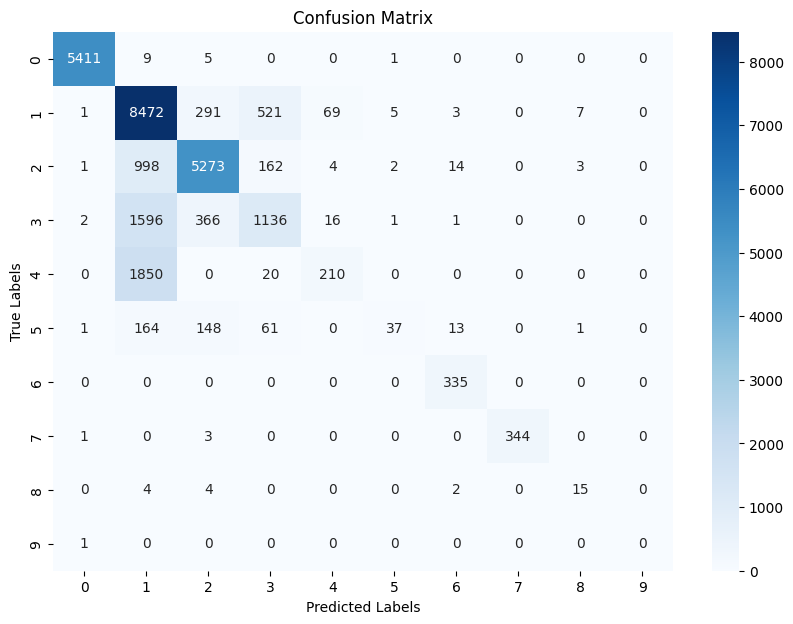

Start Round 23 ...
client_0: Loss = 0.4265, Accuracy = 0.7969
client_1: Loss = 0.4361, Accuracy = 0.7915
client_2: Loss = 0.4314, Accuracy = 0.7974
client_3: Loss = 0.436, Accuracy = 0.7966
client_4: Loss = 0.4381, Accuracy = 0.7932
After round 23, train_loss = 0.4205, train_acc = 0.8019, dev_loss = 0.4375, dev_acc = 0.7939, test_loss = 0.4298, test_acc = 0.7984
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9984    0.9987    0.9986     17935
           1     0.8002    0.7749    0.7874     31167
           2     0.7894    0.9129    0.8467     21701
           3     0.5694    0.5164    0.5416     10381
           4     0.6056    0.5478    0.5752      6559
           5     0.4758    0.1822    0.2635      1405
           6     0.9149    0.9950    0.9533      1189
           7     0.9948    0.9878    0.9913      1151
           8     0.8919    0.4074    0.5593        81
           9     0.0000    0.0000    0.0000        10



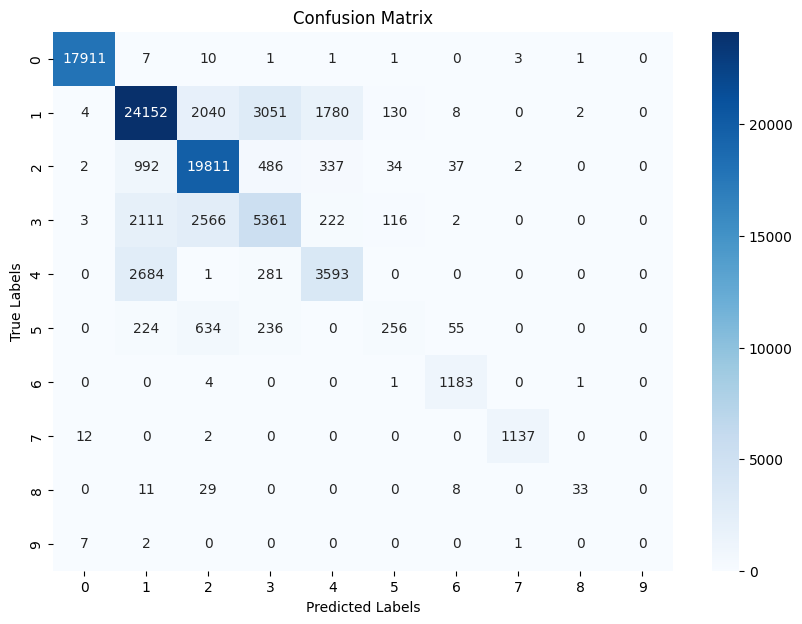

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9973    0.9986    0.9980      3666
           1     0.7902    0.7692    0.7796      6317
           2     0.7843    0.9100    0.8425      4476
           3     0.5566    0.4944    0.5236      2130
           4     0.5752    0.5196    0.5459      1355
           5     0.5079    0.2025    0.2896       316
           6     0.8938    0.9879    0.9385       247
           7     0.9955    0.9822    0.9888       225
           8     1.0000    0.3478    0.5161        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7936     18758
   macro avg     0.7101    0.6212    0.6423     18758
weighted avg     0.7864    0.7936    0.7872     18758



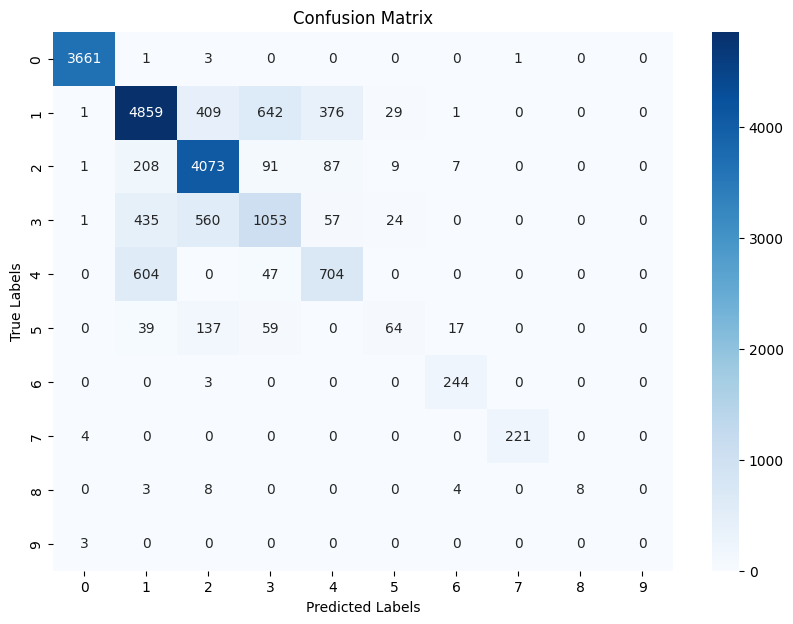

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9971    0.9982      5426
           1     0.7901    0.7729    0.7814      9369
           2     0.7845    0.9111    0.8431      6457
           3     0.5656    0.5103    0.5365      3118
           4     0.6271    0.5481    0.5849      2080
           5     0.4591    0.1718    0.2500       425
           6     0.9254    1.0000    0.9613       335
           7     1.0000    0.9885    0.9942       348
           8     0.9091    0.4000    0.5556        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7985     27584
   macro avg     0.7060    0.6300    0.6505     27584
weighted avg     0.7916    0.7985    0.7924     27584



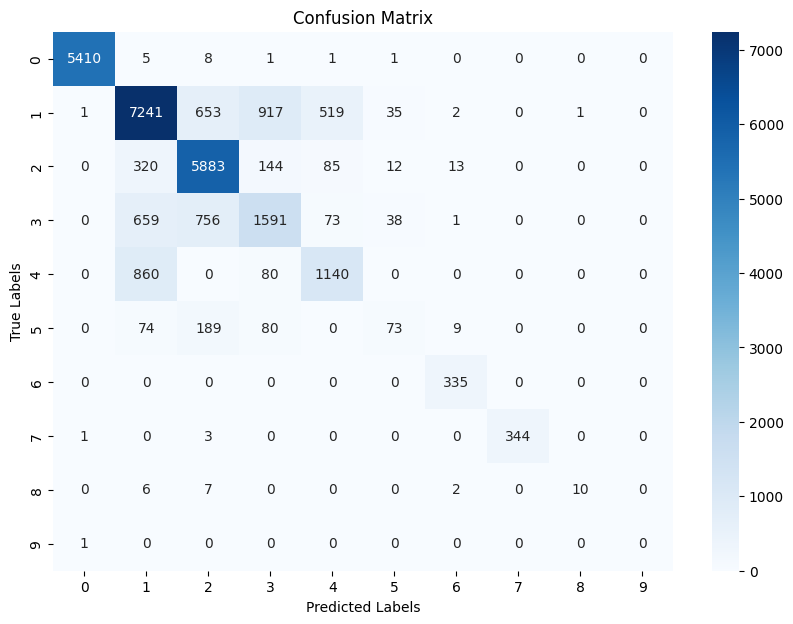

Start Round 24 ...
client_0: Loss = 0.4222, Accuracy = 0.7993
client_1: Loss = 0.432, Accuracy = 0.7941
client_2: Loss = 0.4348, Accuracy = 0.7947
client_3: Loss = 0.4303, Accuracy = 0.7944
client_4: Loss = 0.4306, Accuracy = 0.7977
client_3: Loss = 0.4236, Accuracy = 0.7984
client_4: Loss = 0.4346, Accuracy = 0.7949
After round 25, train_loss = 0.5013, train_acc = 0.7720, dev_loss = 0.5183, dev_acc = 0.7654, test_loss = 0.5066, test_acc = 0.7726
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9799    0.9894     17935
           1     0.8609    0.6591    0.7466     31167
           2     0.7289    0.9316    0.8178     21701
           3     0.5036    0.5037    0.5037     10381
           4     0.5100    0.6974    0.5891      6559
           5     0.4421    0.1331    0.2046      1405
           6     0.8863    0.9966    0.9382      1189
           7     0.9862    0.9930    0.9896      1151
           8     0.3659

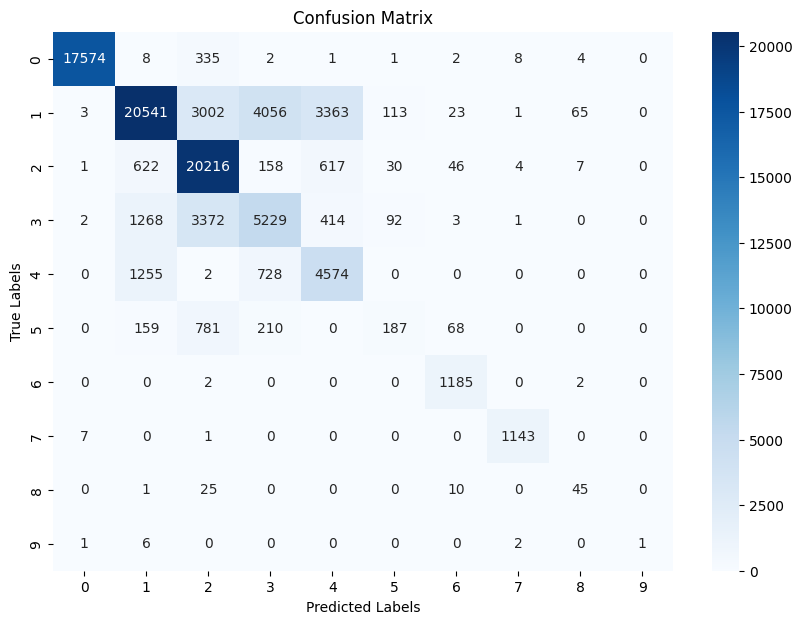

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9823    0.9901      3666
           1     0.8531    0.6565    0.7420      6317
           2     0.7274    0.9283    0.8157      4476
           3     0.4820    0.4784    0.4802      2130
           4     0.4976    0.6775    0.5737      1355
           5     0.3889    0.1108    0.1724       316
           6     0.8777    0.9879    0.9295       247
           7     0.9780    0.9867    0.9823       225
           8     0.5217    0.5217    0.5217        23
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.7652     18758
   macro avg     0.6324    0.6330    0.6208     18758
weighted avg     0.7771    0.7652    0.7616     18758



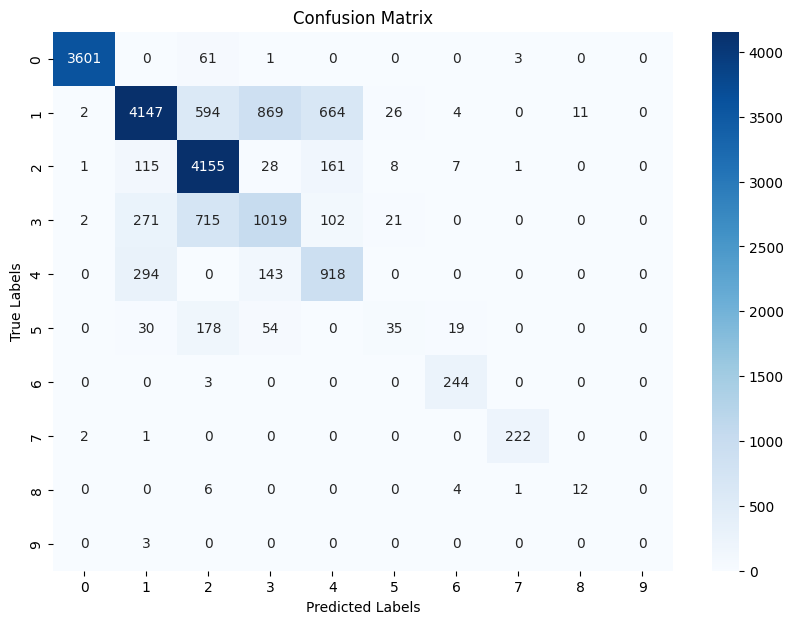

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9797    0.9895      5426
           1     0.8535    0.6606    0.7448      9369
           2     0.7283    0.9302    0.8169      6457
           3     0.5074    0.5074    0.5074      3118
           4     0.5281    0.7048    0.6038      2080
           5     0.4472    0.1294    0.2007       425
           6     0.9076    0.9970    0.9502       335
           7     0.9942    0.9885    0.9914       348
           8     0.4444    0.6400    0.5246        25
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7725     27584
   macro avg     0.6410    0.6538    0.6329     27584
weighted avg     0.7850    0.7725    0.7693     27584



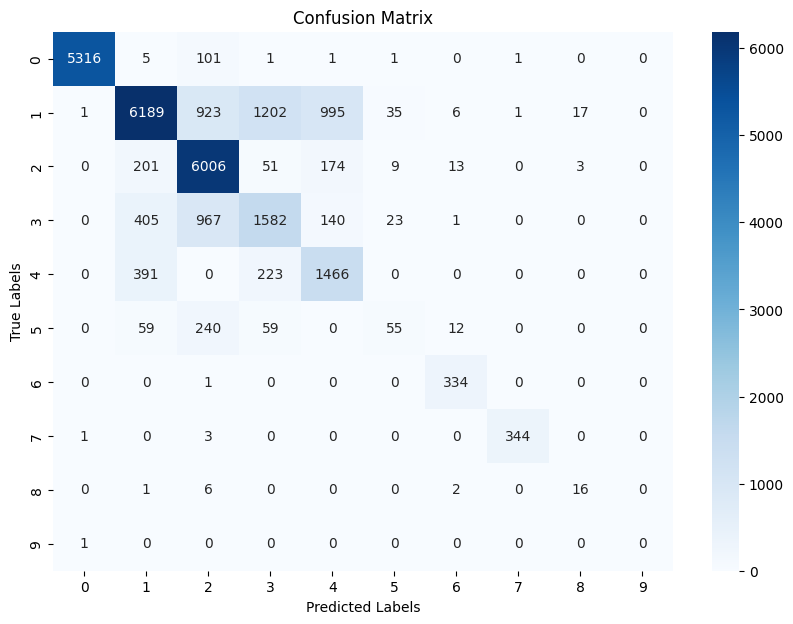

In [64]:
# Create the global model with the correct input dimensions and number of classes
global_net = to_device(FederatedMLP(input_dim=input_dim, num_classes=num_classes), device)
history = []
for i in range(rounds):
    print('Start Round {} ...'.format(i + 1))
    curr_parameters = global_net.get_parameters()
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    for client in clients:
        client_parameters = client.train(curr_parameters)
        fraction = client.get_dataset_size() / total_train_size
        for layer_name in client_parameters:
            new_parameters[layer_name]['weight'] += fraction * client_parameters[layer_name]['weight']
            new_parameters[layer_name]['bias'] += fraction * client_parameters[layer_name]['bias']
    global_net.apply_parameters(new_parameters)
    
    # Evaluate on training, development, and testing datasets
    train_loss, train_acc, train_labels, train_preds = global_net.evaluate(train_dataset)
    dev_loss, dev_acc, dev_labels, dev_preds = global_net.evaluate(dev_dataset)
    test_loss, test_acc, test_labels, test_preds = global_net.evaluate(test_dataset)
    
    # Print results
    print('After round {}, train_loss = {:.4f}, train_acc = {:.4f}, dev_loss = {:.4f}, dev_acc = {:.4f}, test_loss = {:.4f}, test_acc = {:.4f}'.format(
        i + 1, train_loss, train_acc, dev_loss, dev_acc, test_loss, test_acc
    ))
    
    # Append results to history
    history.append({
        'round': i + 1,
        'train_loss': train_loss,
        'train_acc': train_acc,
        'dev_loss': dev_loss,
        'dev_acc': dev_acc,
        'test_loss': test_loss,
        'test_acc': test_acc
    })
    
    # Print classification reports and confusion matrices
    print("Training Data:")
    print_classification_report_and_confusion_matrix(train_labels, train_preds, classes)

    print("Development Data:")
    print_classification_report_and_confusion_matrix(dev_labels, dev_preds, classes)
    
    print("Test Data:")
    print_classification_report_and_confusion_matrix(test_labels, test_preds, classes)

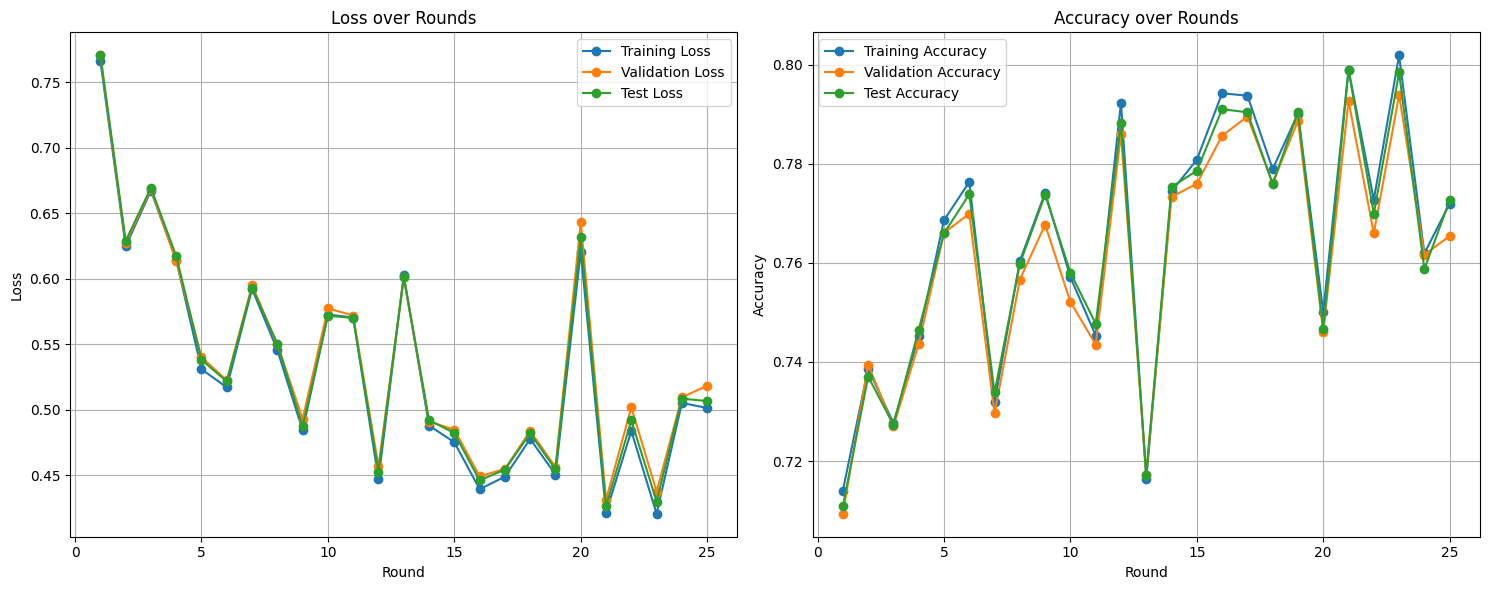

In [65]:
# After the federated learning rounds
def plot_history(history):
    rounds = [entry['round'] for entry in history]
    train_losses = [entry['train_loss'] for entry in history]
    train_accs = [entry['train_acc'] for entry in history]
    dev_losses = [entry['dev_loss'] for entry in history]
    dev_accs = [entry['dev_acc'] for entry in history]
    test_losses = [entry['test_loss'] for entry in history]
    test_accs = [entry['test_acc'] for entry in history]
    
    plt.figure(figsize=(15, 6))
    
    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(rounds, train_losses, marker='o', label='Training Loss')
    plt.plot(rounds, dev_losses, marker='o', label='Validation Loss')
    plt.plot(rounds, test_losses, marker='o', label='Test Loss')
    plt.xlabel('Round')
    plt.ylabel('Loss')
    plt.title('Loss over Rounds')
    plt.legend()
    plt.grid(True)

    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(rounds, train_accs, marker='o', label='Training Accuracy')
    plt.plot(rounds, dev_accs, marker='o', label='Validation Accuracy')
    plt.plot(rounds, test_accs, marker='o', label='Test Accuracy')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Rounds')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

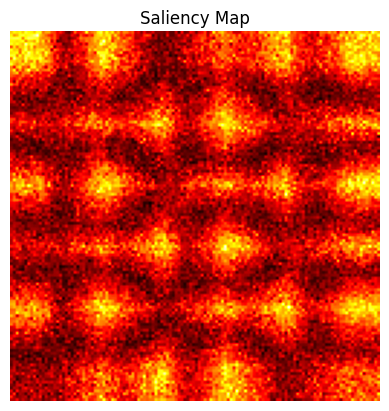

In [67]:
def compute_saliency_map(model, image, label):
    model.eval()
    image = image.unsqueeze(0).to(device)  # Add batch dimension
    image.requires_grad_()
    label = torch.tensor([label]).to(device)
    
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    
    saliency, _ = torch.max(image.grad.data.abs(), dim=1)
    return saliency[0].cpu().numpy()

# Example usage with a sample image and label
sample_image, sample_label = train_dataset[0]
saliency_map = compute_saliency_map(global_net, sample_image, sample_label)

plt.imshow(saliency_map, cmap='hot')
plt.axis('off')
plt.title('Saliency Map')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

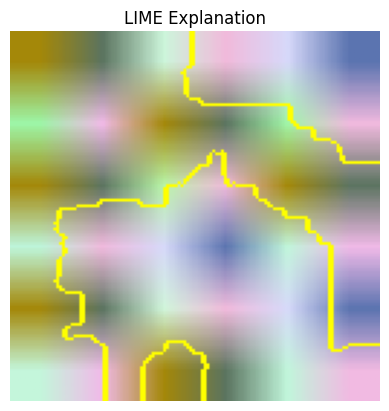

In [68]:
def lime_explanation(model, image, label):
    def predict_fn(images):
        images = torch.stack([transforms.ToTensor()(img) for img in images]).to(device)
        with torch.no_grad():
            outputs = model(images)
        return F.softmax(outputs, dim=1).cpu().numpy()

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image.numpy().transpose(1, 2, 0), predict_fn, top_labels=10, hide_color=0, num_samples=1000)
    
    temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp, mask))
    plt.axis('off')
    plt.title('LIME Explanation')
    plt.show()

# Example usage with a sample image and label
sample_image, sample_label = train_dataset[0]
lime_explanation(global_net, sample_image, sample_label)

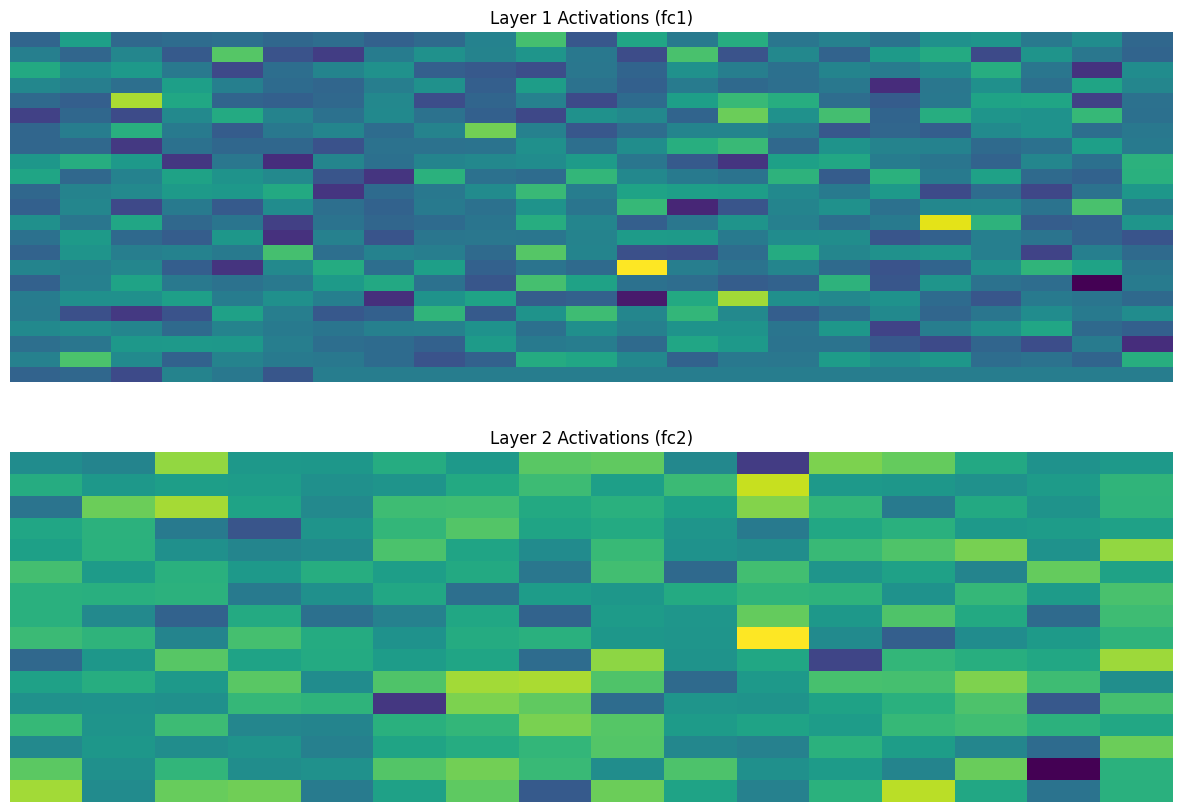

In [69]:
def visualize_mlp_feature_maps(model, data):
    model.eval()
    with torch.no_grad():
        x = data.unsqueeze(0).to(device)  # Add batch dimension and move to device
        activations = []
        
        def hook_fn(module, input, output):
            activations.append(output.cpu().numpy())
        
        # Register hooks on the fully connected layers
        hooks = []
        for layer_name in ['fc1', 'fc2']:  # Replace with your actual layer names
            layer = getattr(model, layer_name)
            hooks.append(layer.register_forward_hook(hook_fn))
        
        _ = model(x)  # Forward pass to activate hooks
        
        # Remove hooks
        for hook in hooks:
            hook.remove()
        
        # Plot activations
        num_layers = len(activations)
        fig, axes = plt.subplots(num_layers, 1, figsize=(15, 5 * num_layers))
        for i, act in enumerate(activations):
            act = act.squeeze()  # Remove batch dimension
            
            # Reshape 1D activation to 2D grid for visualization (e.g., square grid)
            grid_size = int(np.ceil(np.sqrt(act.size)))
            reshaped_act = np.pad(act, (0, grid_size**2 - act.size), 'constant').reshape(grid_size, grid_size)
            
            ax = axes[i] if num_layers > 1 else axes
            ax.imshow(reshaped_act, aspect='auto', cmap='viridis')
            ax.axis('off')
            ax.set_title(f'Layer {i+1} Activations (fc{i+1})')
        plt.show()

# Example usage with a sample input
sample_data = torch.randn(input_dim)  # Replace with real data from your dataset
visualize_mlp_feature_maps(global_net, sample_data)